In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

input_dir = r'''trainset_python\python'''
file_list = glob.glob(input_dir + r'''\**\*.npy''' , recursive=True)
label_list =[]
data_list = []
data = np.array([])
for file in file_list :
    if '.labels' in file :
        label_list.append(file)
    elif '.npy' in file: 
        data_list.append(file)

# load features list
for file in data_list:
    if data.shape[0] == 0:
        data = np.load(file)
    else:
        file_data = np.load(file)
        data = np.vstack([data,file_data])
        

#data_label = np.load(r'''trainset_python\python\comcuc\25627.labels.npy''')
print (data.shape)
#print(data_label.shape)
print(label_list)
print(data_list)

(120000, 548)
['trainset_python\\python\\comcuc\\133067.labels.npy', 'trainset_python\\python\\comcuc\\182336.labels.npy', 'trainset_python\\python\\comcuc\\189031.labels.npy', 'trainset_python\\python\\comcuc\\240515.labels.npy', 'trainset_python\\python\\comcuc\\25627.labels.npy', 'trainset_python\\python\\comcuc\\25629.labels.npy', 'trainset_python\\python\\comcuc\\263382.labels.npy', 'trainset_python\\python\\comcuc\\26379.labels.npy', 'trainset_python\\python\\comcuc\\277236.labels.npy', 'trainset_python\\python\\comcuc\\310525.labels.npy', 'trainset_python\\python\\comcuc\\318234.labels.npy', 'trainset_python\\python\\comcuc\\318483.labels.npy', 'trainset_python\\python\\comcuc\\319117.labels.npy', 'trainset_python\\python\\comcuc\\369543.labels.npy', 'trainset_python\\python\\comcuc\\369573.labels.npy', 'trainset_python\\python\\comcuc\\369578.labels.npy', 'trainset_python\\python\\comcuc\\371677.labels.npy', 'trainset_python\\python\\comcuc\\371679.labels.npy', 'trainset_python

In [2]:
from scipy import stats as st
#load label list
label_data = np.array([])
for file in label_list:
        file_data = np.load(file).T
        mode_label,_ = st.mode(file_data)
        label_data = np.append(label_data,mode_label)
print(label_data.shape)

C:\Users\moham\AppData\Local\Temp\ipykernel_39088\1105618780.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label,_ = st.mode(file_data)


(120000,)


[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0.]


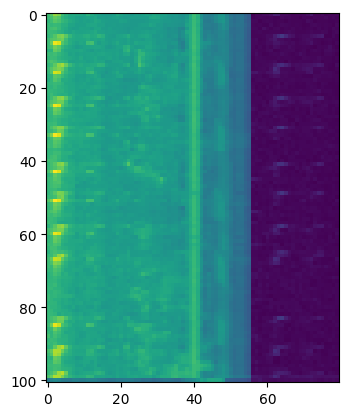

In [3]:
norm = np.linalg.norm(data[0:101,20:100])
normalized_array =data[0:101,20:100]
plt.imshow(normalized_array)
print(label_data[0:101])

In [32]:
# count occurrences of each label
label_for_wights = label_data.reshape((-1,100))
max_label  = np.array(label_for_wights)
max_label = np.max(label_for_wights,axis = 1)
#print(max_label.shape)
occ = np.array([np.count_nonzero(label_data == i) for i in range(7)])
occ_sum = np.sum(occ)
wight = occ_sum/occ
print(occ)
print(wight)
occ = np.array([np.count_nonzero(max_label == i) for i in range(7)])
occ_sum = np.sum(occ)
wight = occ_sum/occ
print(occ)
print(wight)

[85358  5833  8954  8198  2324  5111  4222]
[ 1.40584362 20.57260415 13.40183158 14.63771652 51.63511188 23.47877128
 28.42254856]
[ 30 196 190 195 195 197 197]
[40.          6.12244898  6.31578947  6.15384615  6.15384615  6.09137056
  6.09137056]


In [5]:
import re
with open(input_dir+r'\feature_names.txt') as my_file:
    feature_text = my_file.read() 
    feature_text = feature_text.splitlines()
    print(feature_text)
    #extract raw std
    regex = re.compile(r'raw_(.*)_std_(.*)')
    raw_std = [regex.search(feature).group() for feature in feature_text if regex.search(feature)!= None ]
    print (raw_std)
    print(len(raw_std))

['zcr_mean', 'zcr_std', 'yin_0', 'yin_1', 'yin_2', 'yin_3', 'yin_4', 'yin_5', 'yin_6', 'yin_7', 'yin_8', 'yin_9', 'yin_10', 'yin_11', 'yin_12', 'yin_13', 'raw_melspect_mean_0', 'raw_melspect_mean_1', 'raw_melspect_mean_2', 'raw_melspect_mean_3', 'raw_melspect_mean_4', 'raw_melspect_mean_5', 'raw_melspect_mean_6', 'raw_melspect_mean_7', 'raw_melspect_mean_8', 'raw_melspect_mean_9', 'raw_melspect_mean_10', 'raw_melspect_mean_11', 'raw_melspect_mean_12', 'raw_melspect_mean_13', 'raw_melspect_mean_14', 'raw_melspect_mean_15', 'raw_melspect_mean_16', 'raw_melspect_mean_17', 'raw_melspect_mean_18', 'raw_melspect_mean_19', 'raw_melspect_mean_20', 'raw_melspect_mean_21', 'raw_melspect_mean_22', 'raw_melspect_mean_23', 'raw_melspect_mean_24', 'raw_melspect_mean_25', 'raw_melspect_mean_26', 'raw_melspect_mean_27', 'raw_melspect_mean_28', 'raw_melspect_mean_29', 'raw_melspect_mean_30', 'raw_melspect_mean_31', 'raw_melspect_mean_32', 'raw_melspect_mean_33', 'raw_melspect_mean_34', 'raw_melspect_me

In [6]:
data_mel = data[:,:]
#data_label = data_label[:,1]
print(data_mel.shape)
df = pd.DataFrame(data_mel, columns = feature_text)
df['label'] = label_data
df = df.drop(columns=['zcr_mean'
                 ,'raw_bandwidth_mean'
                 ,'raw_energy_mean'
                 ,'raw_power_mean'
                 ,'cln_power_mean'
                 ,'cln_energy_mean'])
df = df.drop(columns=raw_std)
print(df.shape)
print(list(enumerate(df.columns.to_numpy())))

(120000, 548)
(120000, 416)
[(0, 'zcr_std'), (1, 'yin_0'), (2, 'yin_1'), (3, 'yin_2'), (4, 'yin_3'), (5, 'yin_4'), (6, 'yin_5'), (7, 'yin_6'), (8, 'yin_7'), (9, 'yin_8'), (10, 'yin_9'), (11, 'yin_10'), (12, 'yin_11'), (13, 'yin_12'), (14, 'yin_13'), (15, 'raw_melspect_mean_0'), (16, 'raw_melspect_mean_1'), (17, 'raw_melspect_mean_2'), (18, 'raw_melspect_mean_3'), (19, 'raw_melspect_mean_4'), (20, 'raw_melspect_mean_5'), (21, 'raw_melspect_mean_6'), (22, 'raw_melspect_mean_7'), (23, 'raw_melspect_mean_8'), (24, 'raw_melspect_mean_9'), (25, 'raw_melspect_mean_10'), (26, 'raw_melspect_mean_11'), (27, 'raw_melspect_mean_12'), (28, 'raw_melspect_mean_13'), (29, 'raw_melspect_mean_14'), (30, 'raw_melspect_mean_15'), (31, 'raw_melspect_mean_16'), (32, 'raw_melspect_mean_17'), (33, 'raw_melspect_mean_18'), (34, 'raw_melspect_mean_19'), (35, 'raw_melspect_mean_20'), (36, 'raw_melspect_mean_21'), (37, 'raw_melspect_mean_22'), (38, 'raw_melspect_mean_23'), (39, 'raw_melspect_mean_24'), (40, 'raw_

In [7]:
final_data = df.to_numpy()
final_data = final_data.astype('float32')
final_data_reshaped = np.reshape(final_data,(1200,-1,416))
#label_data_reshaped = np.reshape(label_data,(1200,-1)) 
final_data_reshaped = np.reshape(final_data,(1200,1,100,416))
print(final_data_reshaped.shape)
#print(label_data_reshaped.shape)

(1200, 1, 100, 416)


In [8]:
import torch
def count_parameters(model: torch.nn.Module, only_trainable: bool = True) -> int:
    """
    Count (trainable) paramaters of specified model.
    
    :param model: model for which to compute the amount of (trainable) parameters
    :param only_trainable: only include trainable parameters in total count
    :return: amount of (trainable) parameters of the specified model
    """
    return sum(parameter.numel() for parameter in model.parameters() if any(
        (not only_trainable, only_trainable and parameter.requires_grad)))

c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

print(torch.cuda.is_available())
device = torch.device("cuda" )

True


In [10]:

#split to train / validate
def data_loader(train,test):
# define the train and val splits
    TRAIN_SPLIT = 0.75
    VAL_SPLIT = 1 - TRAIN_SPLIT
    print(final_data_reshaped.shape)
    numTrainSamples = int(len(final_data_reshaped) * TRAIN_SPLIT)
    numValSamples = int(len(final_data_reshaped) * VAL_SPLIT)
    # set the device we will be using to train the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    #(trainData, valData) = torch.utils.data.random_split(final_data_reshaped,[numTrainSamples, numValSamples],generator=torch.Generator().manual_seed(42))

    INIT_LR = 1e-3
    BATCH_SIZE = 20
    EPOCHS = 10

    #trainData    = torch.utils.data.TensorDataset(torch.tensor(trainData).to(device), torch.tensor(trainData).to(device))
    #valData    = torch.utils.data.TensorDataset(torch.tensor(valData).to(device), torch.tensor(valData).to(device))


    trainDataLoader = torch.utils.data.DataLoader(train, shuffle=True,batch_size=BATCH_SIZE)
    valDataLoader = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE)
    # calculate steps per epoch for training and validation set
    trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
    valSteps = len(valDataLoader.dataset) // BATCH_SIZE
    return trainDataLoader,valDataLoader


In [11]:

#split to train / validate
#split to train / validate
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT
print(final_data_reshaped.shape)
numTrainSamples = int(len(final_data_reshaped) * TRAIN_SPLIT)
numValSamples = int(len(final_data_reshaped) * VAL_SPLIT)
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

(trainData, valData) = torch.utils.data.random_split(final_data_reshaped,[numTrainSamples, numValSamples],generator=torch.Generator().manual_seed(42))
# define the train and val splits
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT
print(final_data_reshaped.shape)
numTrainSamples = int(len(final_data_reshaped) * TRAIN_SPLIT)
numValSamples = int(len(final_data_reshaped) * VAL_SPLIT)
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#(trainData, valData) = torch.utils.data.random_split(final_data_reshaped,[numTrainSamples, numValSamples],generator=torch.Generator().manual_seed(42))

INIT_LR = 1e-3
BATCH_SIZE = 20
EPOCHS = 10

#trainData    = torch.utils.data.TensorDataset(torch.tensor(trainData).to(device), torch.tensor(trainData).to(device))
#valData    = torch.utils.data.TensorDataset(torch.tensor(valData).to(device), torch.tensor(valData).to(device))


trainDataLoader = torch.utils.data.DataLoader(trainData, shuffle=True,batch_size=BATCH_SIZE)
valDataLoader = torch.utils.data.DataLoader(valData, batch_size=BATCH_SIZE)
# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE


(1200, 1, 100, 416)
(1200, 1, 100, 416)


In [12]:
def eval_fun(preds,target_i):
    #print("out shape :",preds.shape)
    #print(target_i)
    tp = torch.sum(torch.eq(preds,1) & torch.eq(target_i,1),dim = 0)
    tn = torch.sum(torch.eq(preds,0) & torch.eq(target_i,0),dim = 0)
    fp = torch.sum(torch.eq(preds,1) & torch.eq(target_i,0),dim = 0)
    fn = torch.sum(torch.eq(preds,0) & torch.eq(target_i,1),dim = 0)
    #print("tp:",tp.shape)
    #print( tp ,tn ,fp ,fn)
    acc = (tp + tn) / (tp + tn + fp + fn +1e-6)
    #print("acc_test",acc)
    recall = tp / (tp + fn+1e-6)
    prec = tp / (tp + fp+1e-6)
    f1 = 2*(recall*prec)/(recall+prec+1e-6)
    #print(recall)
    return acc,recall,prec,f1

In [13]:
def eval_test(model) :
    f1_list = np.array([]) 
    acc_list = np.array([]) 
    for i, data in enumerate(valDataLoader):
            # get the inputs; data is a list of [inputs, labels]
            current_batch_size = len(data)
            inputs =data[:,0,:,:-1]
            #print(inputs.size())
            # defining the targets
            labels,_ = torch.max(data[:,0,:,-1],dim = 1)
            
            #print("_labels",labels)
            labels = labels.int()
            labels = labels.numpy()
            #print(labels)
            targets = torch.zeros([current_batch_size,7]) 
            preds = torch.zeros([current_batch_size,7]) 
            for i_2,label in enumerate(labels):
                targets[i_2,label] =1.0
            #targets = targets.type(torch.LongTensor)
            #print(labels)
            
            (inputs, targets,preds) = (inputs.to(device), targets.to(device),preds.to(device))
           # print(inputs.get_device())
           
            
            outputs = model(inputs)
            # forward + backward + optimize
            # zero the parameter gradients
            
            _,Maxs_out_i= torch.max(outputs,dim = 1)
            Maxs_out_i = Maxs_out_i.int().cpu()
            Maxs_out_i = Maxs_out_i.numpy()
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1.0
            
            targets = targets.bool()
            preds = preds.bool()
            #targets = targets.cpu().numpy()
            #preds = preds.cpu().numpy()
            #print(targets.dtype)
            # print statistics
            #targets = targets.type('torch.BoolTensor')
            #preds = preds.type('torch.BoolTensor')
            #print(inputs.get_device(),preds.get_device(),targets.get_device())
            acc,recall,prec,f1 = eval_fun(preds,targets)
            #print(preds,targets)
            acc = acc.mean()
            f1 = f1.mean()
            #print("f1__",f1.size())
            acc_list = np.append(acc_list,acc.cpu().numpy())
            f1_list = np.append(f1_list,f1.cpu().numpy())
            del(outputs)
    return acc_list.mean(),f1_list.mean()

In [70]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(41500, 2000)
        #self.fc5 = nn.Linear(5000, 1000)
        self.fc6 = nn.Linear(2000, 500)
        self.fc7 = nn.Linear(500, 200)
        #self.fc8 = nn.Linear(200, 100)
        self.fc9 = nn.Linear(200, 100)
        #self.fc10 = nn.Linear(50, 25)
        self.fc11 = nn.Linear(100, 7)

    def forward(self, x):
        x = torch.nn.functional.normalize(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = F.relu(self.fc4(x))
        #x = F.relu(self.fc5(x))        
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        #x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        #x = F.relu(self.fc10(x))
        x = self.fc11(x)
        return x




In [71]:


net = Net()
net.cuda()
import torch.optim as optim

wights = torch.from_numpy(wight).to(device)
criterion = nn.CrossEntropyLoss(weight=wights)
optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_list = []
acc_list = []
f1_list = []
f1_train_list = []
for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainDataLoader):
        #data = torch.from_numpy(data)
        #test_data = torch.from_numpy(test_data)
        current_batch_size = len(data)
        # get the inputs; data is a list of [inputs, labels]
        inputs =data[:,0,:,:-1]
        # defining the targets
        labels,_ = torch.max(data[:,0,:,-1],dim = 1)
        labels = labels.int()
        labels = labels.numpy()
        targets = torch.zeros([current_batch_size,7])
        ones = torch.ones([current_batch_size]).bool
        for i_2,label in enumerate(labels):
            targets[i_2,label] =1.0
        #print(targets)
        #targets = targets.type(torch.LongTensor)
        #print(labels)
        (inputs, targets) = (inputs.to(device), targets.to(device))
        # zero the parameter gradients
        
        #print(torch.cuda.memory_allocated() / torch.cuda.max_memory_allocated())
        #continue    
        # forward + backward + optimize#
        

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()    
        optimizer.step()
        optimizer.zero_grad()
        
        
        _, Maxs_out_i = torch.max(outputs, dim=1)
        
        # print statistics
        running_loss += loss.item()
        
        preds = torch.zeros([current_batch_size,7])
        preds = preds.to(device)
        for i_2,Max_out_i in enumerate(Maxs_out_i):
            preds[i_2,Max_out_i] =1.0


        if i % 50 == 0:    # print every 5 mini-batches
            _,_,_,f1_train = eval_fun(preds,targets)
            f1_train = f1_train.mean()
            acc,f1 = eval_test(net)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss :.3f} f1_train : {f1_train:.5f} f1: {f1:.5f} acc:{acc}')
            loss_list.append(running_loss)
            f1_list.append(f1)
            f1_train_list.append(f1_train)
            acc_list.append(acc)
            #print (f'outputs{nn.Softmax( outputs)}')
            running_loss = 0.0
            
print('Finished Training')


[1,     1] loss: 12.059 f1_train : 0.01361 f1: 0.03097 acc:0.7514285206794739
[2,     1] loss: 11.809 f1_train : 0.02597 f1: 0.05093 acc:0.7638094862302144
[3,     1] loss: 15.166 f1_train : 0.05714 f1: 0.13083 acc:0.8057142337163289
[4,     1] loss: 8.104 f1_train : 0.27381 f1: 0.25512 acc:0.8199999570846558
[5,     1] loss: 5.210 f1_train : 0.59841 f1: 0.42491 acc:0.8695237676302592
[6,     1] loss: 4.330 f1_train : 0.75340 f1: 0.44859 acc:0.875238053003947
[7,     1] loss: 4.352 f1_train : 0.73809 f1: 0.49810 acc:0.8933332721392314
[8,     1] loss: 1.551 f1_train : 0.82143 f1: 0.47427 acc:0.8819047292073567
[9,     1] loss: 5.792 f1_train : 0.94286 f1: 0.45365 acc:0.8799999515215556
[10,     1] loss: 0.780 f1_train : 0.80000 f1: 0.42777 acc:0.8647618850072225
[11,     1] loss: 0.991 f1_train : 0.75714 f1: 0.45874 acc:0.875238041083018
[12,     1] loss: 0.213 f1_train : 1.00000 f1: 0.45432 acc:0.8809523463249207
[13,     1] loss: 0.013 f1_train : 0.85714 f1: 0.47947 acc:0.88285709619

In [72]:
net = Net()
net.cuda()
print("FNN2D param count: " , count_parameters(net) )

FNN2D param count:  84123507


In [73]:
loss_list_list = []
f1_list_list= []
f1_train_list_list= []

In [74]:
loss_list_list.append(loss_list)
f1_list_list.append(f1_list)
f1_train_list_list.append(f1_train_list)

tensor(0.0008, device='cuda:0', dtype=torch.float64, grad_fn=<DivBackward1>)


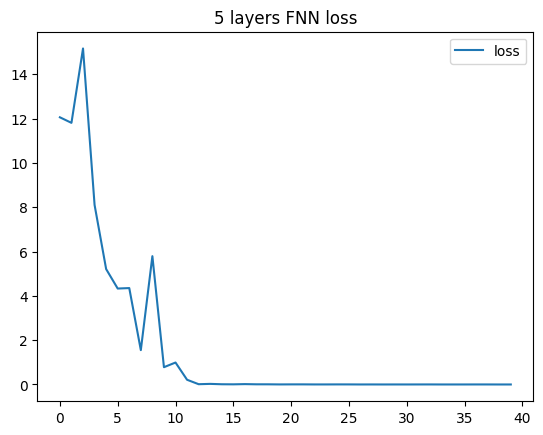

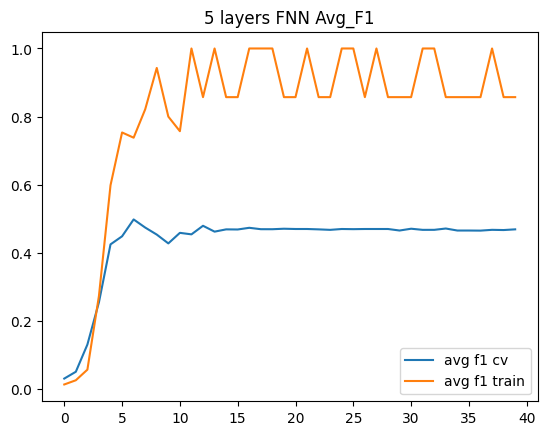

In [75]:
f1_train_list_cpu = [[torch.Tensor.cpu(item) for item in _list] for _list in f1_train_list_list]

loss_list_np = np.array(loss_list_list)
f1_list_np = np.array(f1_list_list)
f1_train_list_np = np.array(f1_train_list_cpu)
print(loss)
loss_list_avg = np.average(loss_list_np,axis = 0)
f1_list_avg = np.average(f1_list_np,axis = 0)
f1_train_list_avg = np.average(f1_train_list_np,axis = 0)
import matplotlib.pyplot as plt
plt.plot(loss_list_avg,label = 'loss')
plt.title("5 layers FNN loss")
plt.legend()
plt.show()
plt.plot(f1_list_avg,label = 'avg f1 cv')
plt.title("5 layers FNN Avg_F1")
plt.plot(f1_train_list_avg,label = 'avg f1 train')
plt.legend()
plt.show()

In [41]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(41500, 2000)
        #self.fc5 = nn.Linear(2000, 1000)
        self.fc6 = nn.Linear(2000, 500)
        self.fc7 = nn.Linear(500, 200)
        self.fc8 = nn.Linear(200, 100)
        self.fc9 = nn.Linear(100, 50)
        self.fc10 = nn.Linear(50, 25)
        self.fc11 = nn.Linear(25, 7)

    def forward(self, x):
        x = torch.nn.functional.normalize(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = F.relu(self.fc4(x))
        #x = F.relu(self.fc5(x))        
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        x = self.fc11(x)
        return x




In [54]:


net = Net()
net.cuda()
import torch.optim as optim

wights = torch.from_numpy(wight).to(device)
criterion = nn.CrossEntropyLoss(weight=wights)
optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_list = []
acc_list = []
f1_list = []
f1_train_list = []
for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainDataLoader):
        #data = torch.from_numpy(data)
        #test_data = torch.from_numpy(test_data)
        current_batch_size = len(data)
        # get the inputs; data is a list of [inputs, labels]
        inputs =data[:,0,:,:-1]
        # defining the targets
        labels,_ = torch.max(data[:,0,:,-1],dim = 1)
        labels = labels.int()
        labels = labels.numpy()
        targets = torch.zeros([current_batch_size,7])
        ones = torch.ones([current_batch_size]).bool
        for i_2,label in enumerate(labels):
            targets[i_2,label] =1.0
        #print(targets)
        #targets = targets.type(torch.LongTensor)
        #print(labels)
        (inputs, targets) = (inputs.to(device), targets.to(device))
        # zero the parameter gradients
        
        #print(torch.cuda.memory_allocated() / torch.cuda.max_memory_allocated())
        #continue    
        # forward + backward + optimize#
        

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()    
        optimizer.step()
        optimizer.zero_grad()
        
        
        _, Maxs_out_i = torch.max(outputs, dim=1)
        
        # print statistics
        running_loss += loss.item()
        
        preds = torch.zeros([current_batch_size,7])
        preds = preds.to(device)
        for i_2,Max_out_i in enumerate(Maxs_out_i):
            preds[i_2,Max_out_i] =1.0


        if i % 50 == 0:    # print every 5 mini-batches
            _,_,_,f1_train = eval_fun(preds,targets)
            f1_train = f1_train.mean()
            f1 = eval_test(net)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss :.3f} f1_train : {f1_train:.5f} f1: {f1:.5f} ')
            loss_list.append(running_loss)
            f1_list.append(f1)
            f1_train_list.append(f1_train)
            #print (f'outputs{nn.Softmax( outputs)}')
            running_loss = 0.0
            
print('Finished Training')


[1,     1] loss: 15.256 f1_train : 0.04762 f1: 0.04302 
[2,     1] loss: 12.067 f1_train : 0.02597 f1: 0.04375 
[3,     1] loss: 11.317 f1_train : 0.05195 f1: 0.04330 
[4,     1] loss: 15.109 f1_train : 0.10294 f1: 0.15564 
[5,     1] loss: 8.307 f1_train : 0.38095 f1: 0.16914 
[6,     1] loss: 6.060 f1_train : 0.40306 f1: 0.16564 
[7,     1] loss: 9.063 f1_train : 0.40748 f1: 0.23798 
[8,     1] loss: 7.060 f1_train : 0.22222 f1: 0.24115 
[9,     1] loss: 5.697 f1_train : 0.39560 f1: 0.30365 
[10,     1] loss: 3.977 f1_train : 0.56926 f1: 0.27042 
[11,     1] loss: 4.196 f1_train : 0.59913 f1: 0.24898 
[12,     1] loss: 5.470 f1_train : 0.51623 f1: 0.29621 
[13,     1] loss: 3.019 f1_train : 0.80987 f1: 0.28536 
[14,     1] loss: 1.564 f1_train : 0.64286 f1: 0.31150 
[15,     1] loss: 1.106 f1_train : 0.81270 f1: 0.31555 
[16,     1] loss: 1.364 f1_train : 0.55357 f1: 0.31102 
[17,     1] loss: 4.094 f1_train : 0.65555 f1: 0.29225 
[18,     1] loss: 0.617 f1_train : 0.68289 f1: 0.2996

In [43]:
loss_list_list = []
f1_list_list= []
f1_train_list_list= []

In [55]:
loss_list_list.append(loss_list)
f1_list_list.append(f1_list)
f1_train_list_list.append(f1_train_list)

tensor(0.0014, device='cuda:0', dtype=torch.float64, grad_fn=<DivBackward1>)


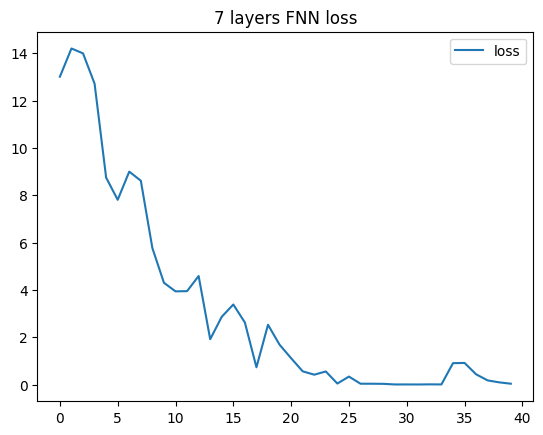

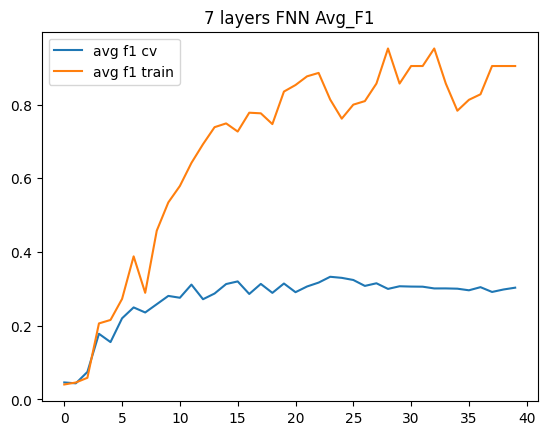

In [58]:
f1_train_list_cpu = [[torch.Tensor.cpu(item) for item in _list] for _list in f1_train_list_list]

loss_list_np = np.array(loss_list_list)
f1_list_np = np.array(f1_list_list)
f1_train_list_np = np.array(f1_train_list_cpu)
print(loss)
loss_list_avg = np.average(loss_list_np,axis = 0)
f1_list_avg = np.average(f1_list_np,axis = 0)
f1_train_list_avg = np.average(f1_train_list_np,axis = 0)
import matplotlib.pyplot as plt
plt.plot(loss_list_avg,label = 'loss')
plt.title("7 layers FNN loss")
plt.legend()
plt.show()
plt.plot(f1_list_avg,label = 'avg f1 cv')
plt.title("7 layers FNN Avg_F1")
plt.plot(f1_train_list_avg,label = 'avg f1 train')
plt.legend()
plt.show()

In [286]:


net = Net()
net.cuda()
import torch.optim as optim

def train_fun(data,test_data):
    data_load,test_data = data_loader(data,test_data)
    wights = torch.from_numpy(wight).to(device)
    criterion = nn.CrossEntropyLoss(weight=wights)
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    loss_list = []
    acc_list = []
    f1_list = []
    f1_train_list = []
    for epoch in range(40):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(data_load):
            #data = torch.from_numpy(data)
            #test_data = torch.from_numpy(test_data)
            current_batch_size = len(data)
            # get the inputs; data is a list of [inputs, labels]
            inputs =data[:,0,:,:-1]
            # defining the targets
            labels,_ = torch.max(data[:,0,:,-1],dim = 1)
            labels = labels.int()
            labels = labels.numpy()
            targets = torch.zeros([current_batch_size,7])
            ones = torch.ones([current_batch_size]).bool
            for i_2,label in enumerate(labels):
                targets[i_2,label] =1.0
            #print(targets)
            #targets = targets.type(torch.LongTensor)
            #print(labels)
            (inputs, targets) = (inputs.to(device), targets.to(device))
            # zero the parameter gradients
            
            #print(torch.cuda.memory_allocated() / torch.cuda.max_memory_allocated())
            #continue    
            # forward + backward + optimize#
            

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            loss.backward()    
            optimizer.step()
            optimizer.zero_grad()
            
            
            _, Maxs_out_i = torch.max(outputs, dim=1)
            
            # print statistics
            running_loss += loss.item()
            
            preds = torch.zeros([current_batch_size,7])
            preds = preds.to(device)
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1.0

    
            if i % 50 == 0:    # print every 5 mini-batches
                _,_,_,f1_train = eval_fun(preds,targets)
                f1_train = f1_train.mean()
                f1 = eval_test(net,test_data)
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss :.3f} f1_train : {f1_train:.5f} f1: {f1:.5f} ')
                loss_list.append(running_loss)
                f1_list.append(f1)
                f1_train_list.append(f1_train)
                #print (f'outputs{nn.Softmax( outputs)}')
                running_loss = 0.0
                
    print('Finished Training')
    return loss_list ,f1_list ,f1_train_list


In [287]:
print("fnn param count: " , count_parameters(net) )
print(net)

fnn param count:  213133307
Net(
  (fc1): Linear(in_features=41500, out_features=5000, bias=True)
  (fc5): Linear(in_features=5000, out_features=1000, bias=True)
  (fc6): Linear(in_features=1000, out_features=500, bias=True)
  (fc7): Linear(in_features=500, out_features=200, bias=True)
  (fc8): Linear(in_features=200, out_features=100, bias=True)
  (fc9): Linear(in_features=100, out_features=50, bias=True)
  (fc10): Linear(in_features=50, out_features=25, bias=True)
  (fc11): Linear(in_features=25, out_features=7, bias=True)
)


modell with k-fold

In [288]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#X_train, X_test, y_train, y_test = train_test_split(final_data_reshaped[:,:,:,:-1],final_data_reshaped[:,:,:,-1],test_size=0.2)
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
loss_list = []
f1_list = []
f1_train_list = []
for train, test in kfold.split(final_data_reshaped):
    #print(final_data_reshaped[train].shape)
    #break
    running_loss,f1,f1_train = train_fun(final_data_reshaped[train], final_data_reshaped[test])
    loss_list.append(running_loss)
    f1_list.append(f1)
    f1_train_list.append(f1_train)

(1200, 1, 100, 416)
[1,     1] loss: 11.902 f1_train : 0.04762 f1: 0.02074 
[2,     1] loss: 11.820 f1_train : 0.03727 f1: 0.02074 
[3,     1] loss: 12.382 f1_train : 0.18800 f1: 0.05247 
[4,     1] loss: 9.655 f1_train : 0.17415 f1: 0.05392 
[5,     1] loss: 15.658 f1_train : 0.12653 f1: 0.06793 
[6,     1] loss: 13.272 f1_train : 0.23044 f1: 0.06083 
[7,     1] loss: 6.659 f1_train : 0.38322 f1: 0.07285 
[8,     1] loss: 10.739 f1_train : 0.27551 f1: 0.06169 
[9,     1] loss: 7.806 f1_train : 0.32143 f1: 0.08636 
[10,     1] loss: 5.804 f1_train : 0.26508 f1: 0.05843 
[11,     1] loss: 6.737 f1_train : 0.41270 f1: 0.07650 
[12,     1] loss: 5.268 f1_train : 0.40363 f1: 0.07114 
[13,     1] loss: 9.459 f1_train : 0.19048 f1: 0.05329 
[14,     1] loss: 7.111 f1_train : 0.44453 f1: 0.08640 
[15,     1] loss: 11.841 f1_train : 0.51880 f1: 0.08168 
[16,     1] loss: 4.715 f1_train : 0.45714 f1: 0.08010 
[17,     1] loss: 5.449 f1_train : 0.47253 f1: 0.07925 
[18,     1] loss: 5.055 f1_tra

tensor(0.0002, device='cuda:0', grad_fn=<DivBackward1>)
(5, 40)


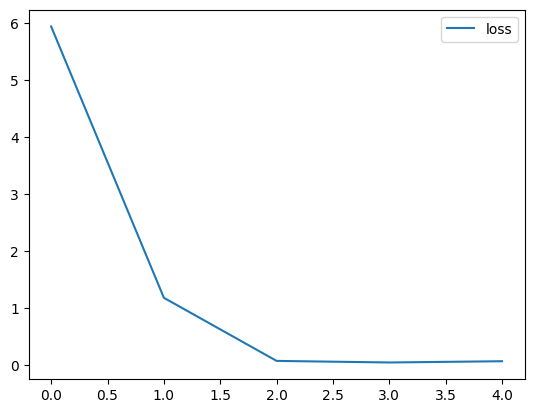

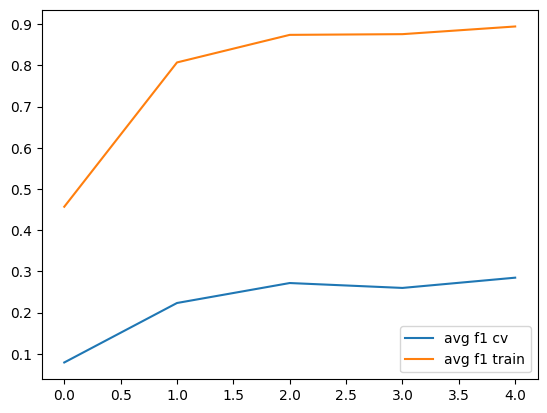

In [296]:

#f1_train_list_cpu = [[torch.Tensor.cpu(item) for item in _list] for _list in f1_train_list]

#loss_list = np.array(loss_list)
#f1_list = np.array(f1_list)
#f1_train_list = np.array(f1_train_list_cpu)
print(loss)
loss_list_avg = np.average(loss_list,axis = 1)
f1_list_avg = np.average(f1_list,axis = 1)
f1_train_list_avg = np.average(f1_train_list_cpu,axis = 1)
print(f1_list.shape)
import matplotlib.pyplot as plt
plt.plot(loss_list_avg,label = 'loss')
plt.legend()
plt.show()
plt.plot(f1_list_avg,label = 'avg f1 cv')
plt.plot(f1_train_list_avg,label = 'avg f1 train')
plt.legend()
plt.show()

CNN

In [95]:
#split to train / validate

# define the train and val splits
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT

numTrainSamples = int(len(final_data_reshaped) * TRAIN_SPLIT)
numValSamples = int(len(final_data_reshaped) * VAL_SPLIT)
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
(trainData, valData) = torch.utils.data.random_split(final_data_reshaped,[numTrainSamples, numValSamples],generator=torch.Generator().manual_seed(42))

In [409]:
def data_loader(train,test):
    INIT_LR = 1e-3
    BATCH_SIZE = 20
    EPOCHS = 10

    #trainData    = torch.utils.data.TensorDataset(torch.tensor(trainData).to(device), torch.tensor(trainData).to(device))
    #valData    = torch.utils.data.TensorDataset(torch.tensor(valData).to(device), torch.tensor(valData).to(device))


    trainDataLoader = torch.utils.data.DataLoader(train, shuffle=True,batch_size=BATCH_SIZE)
    valDataLoader = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE)
    # calculate steps per epoch for training and validation set
    trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
    valSteps = len(valDataLoader.dataset) // BATCH_SIZE
    return trainDataLoader,valDataLoader

In [280]:

INIT_LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 10

#trainData    = torch.utils.data.TensorDataset(torch.tensor(trainData).to(device), torch.tensor(trainData).to(device))
#valData    = torch.utils.data.TensorDataset(torch.tensor(valData).to(device), torch.tensor(valData).to(device))


trainDataLoader = torch.utils.data.DataLoader(trainData, shuffle=True,batch_size=BATCH_SIZE)
valDataLoader = torch.utils.data.DataLoader(valData, batch_size=BATCH_SIZE)
# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE


In [143]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        kernal = 3
        
        self.conv1 = nn.Conv2d(1, 16, kernal)
        self.conv2 = nn.Conv2d(16, 16, kernal)
        #self.conv3 = nn.Conv2d(16, 16, kernal)
        self.pool = nn.MaxPool2d(2)
        #self.conv4 = nn.Conv2d(16, 16, 3)
        self.conv5 = nn.Conv2d(16, 16, 2)
        self.conv6 = nn.Conv2d(16, 8, 2)
        #self.conv5 = nn.Conv2d(10, 5, 3)
        
        self.fc1 = nn.Linear(16800, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 150)
        self.fc4 = nn.Linear(150, 40)
        self.fc5 = nn.Linear(40, 7)
    
    def forward(self, x):
        #x = torch.transpose(x,0,1)
        #x = torch.nn.functional.normalize(x)
        x = F.relu(self.conv1(x))
        x =self.pool(x)
        #x = torch.nn.functional.normalize(x)
        
        x = F.relu(self.conv2(x))
        x =self.pool(x)
        #x = torch.nn.functional.normalize(x)
        
        #x = F.relu(self.conv3(x))
        #x =self.pool(x)
        
        #x = F.relu(self.conv4(x))        
        #x =self.pool(x)
        
        x = F.relu(self.conv5(x))        
        #x =self.pool(x)
        
        x = F.relu(self.conv6(x))        
        #x =self.pool(x)
        #x = torch.nn.functional.normalize(x)
        
        #x = F.relu(self.conv5(x))
        
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = torch.nn.functional.normalize(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x



In [152]:

import torch.optim as optim



net = Net()
net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_list = []
f1_list = []
f1_train_list = []
for epoch in range(70):  # loop over the dataset multiple times

    running_loss = 0.0
    
    for i, data in enumerate(trainDataLoader):
        current_batch_size = len(data)
        # get the inputs; data is a list of [inputs, labels]
        inputs =data[:,:,:,:-1]
        # defining the targets
        labels,_ = torch.max(data[:,:,:,-1],dim = 2)
        labels = labels[:,0]
        labels = labels.int()
        labels = labels.numpy()
        del(data)
        targets = torch.zeros([current_batch_size,7])
        ones = torch.ones([current_batch_size]).bool
        for i_2,label in enumerate(labels):
            targets[i_2,label] =1.0
        #print(targets)
        #targets = targets.type(torch.LongTensor)
        #print(labels)
        (inputs, targets) = (inputs.to(device), targets.to(device))
        # zero the parameter gradients
        
        #print(torch.cuda.memory_allocated() / torch.cuda.max_memory_allocated())
        #continue    
        # forward + backward + optimize#
        

        optimizer.zero_grad()
        #print(inputs.shape)
        #break
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()    
        optimizer.step()
        optimizer.zero_grad()
        
        
        _, Maxs_out_i = torch.max(outputs, dim=1)
        
        # print statistics
        running_loss += loss.item()
        
        preds = torch.zeros([current_batch_size,7])
        preds = preds.to(device)
        for i_2,Max_out_i in enumerate(Maxs_out_i):
            preds[i_2,Max_out_i] =1.0


        if i % 50 == 0:    # print every 5 mini-batches
            _,_,_,f1_train = eval_fun(preds,targets)
            f1_train = f1_train.mean()
            f1 = eval_test(net)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss :.3f} f1_train : {f1_train:.5f} f1: {f1:.5f} ')
            loss_list.append(running_loss)
            f1_list.append(f1)
            f1_train_list.append(f1_train)
            #print (f'outputs{nn.Softmax( outputs)}')
            running_loss = 0.0

print('Finished Training')


[1,     1] loss: 206.919 f1_train : 0.09048 f1: 0.03929 
[2,     1] loss: 7.816 f1_train : 0.00000 f1: 0.05383 
[3,     1] loss: 11.179 f1_train : 0.08722 f1: 0.08332 
[4,     1] loss: 3.563 f1_train : 0.09048 f1: 0.08135 
[5,     1] loss: 2.608 f1_train : 0.08724 f1: 0.11207 
[6,     1] loss: 1.961 f1_train : 0.13605 f1: 0.07450 
[7,     1] loss: 1.975 f1_train : 0.02721 f1: 0.04305 
[8,     1] loss: 1.940 f1_train : 0.01361 f1: 0.05274 
[9,     1] loss: 2.004 f1_train : 0.02597 f1: 0.10576 
[10,     1] loss: 1.791 f1_train : 0.09276 f1: 0.12208 
[11,     1] loss: 1.957 f1_train : 0.13822 f1: 0.20213 
[12,     1] loss: 1.871 f1_train : 0.11508 f1: 0.15426 
[13,     1] loss: 1.712 f1_train : 0.18651 f1: 0.16249 
[14,     1] loss: 1.777 f1_train : 0.17841 f1: 0.18785 
[15,     1] loss: 1.486 f1_train : 0.26513 f1: 0.23966 
[16,     1] loss: 1.370 f1_train : 0.37483 f1: 0.28896 
[17,     1] loss: 1.362 f1_train : 0.40275 f1: 0.23325 
[18,     1] loss: 1.531 f1_train : 0.29478 f1: 0.31409

In [145]:
loss_list_list = []
f1_list_list= []
f1_train_list_list= []

In [153]:
loss_list_list.append(loss_list)
f1_list_list.append(f1_list)
f1_train_list_list.append(f1_train_list)

tensor(0.4785, device='cuda:0', grad_fn=<DivBackward1>)


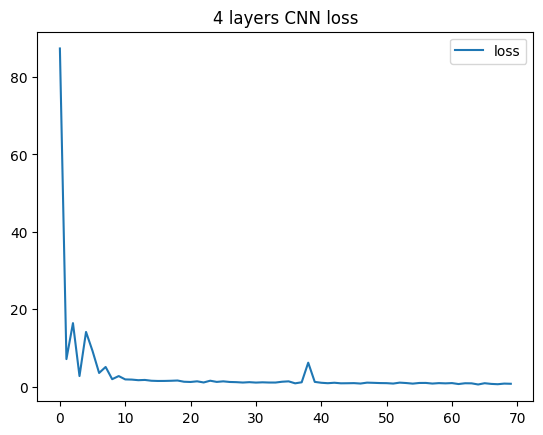

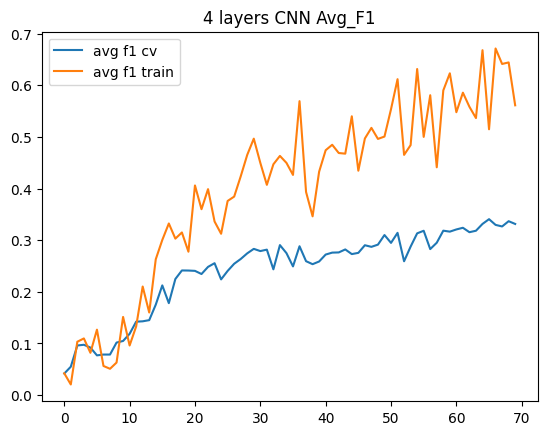

In [154]:
f1_train_list_cpu = [[torch.Tensor.cpu(item) for item in _list] for _list in f1_train_list_list]

loss_list_np = np.array(loss_list_list)
f1_list_np = np.array(f1_list_list)
f1_train_list_np = np.array(f1_train_list_cpu)
print(loss)
loss_list_avg = np.average(loss_list_np,axis = 0)
f1_list_avg = np.average(f1_list_np,axis = 0)
f1_train_list_avg = np.average(f1_train_list_np,axis = 0)
import matplotlib.pyplot as plt
plt.plot(loss_list_avg,label = 'loss')
plt.title("4 layers CNN loss")
plt.legend()
plt.show()
plt.plot(f1_list_avg,label = 'avg f1 cv')
plt.title("4 layers CNN Avg_F1")
plt.plot(f1_train_list_avg,label = 'avg f1 train')
plt.legend()
plt.show()

In [202]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        kernal = 3
        self.pool = nn.MaxPool2d(2)
        self.conv1 = nn.Conv2d(1, 16, kernal)
        self.conv2 = nn.Conv2d(16, 16, kernal)
        self.conv3 = nn.Conv2d(16, 16, kernal)
        self.conv4 = nn.Conv2d(16, 16, 3)
        self.conv6 = nn.Conv2d(16, 8, 3)
        #self.conv5 = nn.Conv2d(8, 4, 3)
        
        self.fc1 = nn.Linear(2208, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc4 = nn.Linear(500, 200)
        self.fc5 = nn.Linear(200, 80)
        self.fc7 = nn.Linear(80, 7)
    
    def forward(self, x):
        #x = torch.nn.functional.normalize(x)
        x = F.relu(self.conv1(x))
        x =self.pool(x)
        #x = torch.nn.functional.normalize(x)
        
        x = F.relu(self.conv2(x))
        x =self.pool(x)
        #x = torch.nn.functional.normalize(x)
        
        x = F.relu(self.conv3(x))
        x =self.pool(x)
        
        x = F.relu(self.conv4(x))        
        #x =self.pool(x)
        
        #x = F.relu(self.conv5(x))        
        #x =self.pool(x)
        
        x = F.relu(self.conv6(x))        
        #x =self.pool(x)
        x = torch.nn.functional.normalize(x)
        
        #x = F.relu(self.conv5(x))
        
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = torch.nn.functional.normalize(x)
        #x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        #x = self.fc6(x)
        x = self.fc7(x)
        return x



In [412]:
def eval_fun(preds,target_i):
    #print("out shape :",preds.shape)
    #print(target_i)
    tp = torch.sum(torch.eq(preds,1) & torch.eq(target_i,1),dim = 0)
    tn = torch.sum(torch.eq(preds,0) & torch.eq(target_i,0),dim = 0)
    fp = torch.sum(torch.eq(preds,1) & torch.eq(target_i,0),dim = 0)
    fn = torch.sum(torch.eq(preds,0) & torch.eq(target_i,1),dim = 0)
    #print("tp:",tp.shape)
    #print( tp ,tn ,fp ,fn)
    acc = (tp + tn) / (tp + tn + fp + fn +1e-6)
    #print("acc_test",acc)
    recall = tp / (tp + fn+1e-6)
    prec = tp / (tp + fp+1e-6)
    f1 = 2*(recall*prec)/(recall+prec+1e-6)
    #print(recall)
    return acc,recall,prec,f1

In [99]:
def eval_test(model,test_data) :
    f1_list = np.array([]) 
    
    for i, data in enumerate(test_data):
            # get the inputs; data is a list of [inputs, labels]
            current_batch_size = len(data)
            inputs =data[:,:,:,:-1]
            # defining the targets
            labels,_ = torch.max(data[:,:,:,-1],dim = 2)
            
            #print("_labels",labels)
            labels = labels[:,0]
            labels = labels.int()
            labels = labels.numpy()
            #print(labels)
            targets = torch.zeros([current_batch_size,7]) 
            preds = torch.zeros([current_batch_size,7]) 
            for i_2,label in enumerate(labels):
                targets[i_2,label] =1.0
            #targets = targets.type(torch.LongTensor)
            #print(labels)
            
            (inputs, targets,preds) = (inputs.to(device), targets.to(device),preds.to(device))
           # print(inputs.get_device())
           
            outputs = model(inputs)
            # forward + backward + optimize
            # zero the parameter gradients
            
            _,Maxs_out_i= torch.max(outputs,dim = 1)
            Maxs_out_i = Maxs_out_i.int().cpu()
            Maxs_out_i = Maxs_out_i.numpy()
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1.0
            
            targets = targets.bool()
            preds = preds.bool()
            #targets = targets.cpu().numpy()
            #preds = preds.cpu().numpy()
            #print(targets.dtype)
            # print statistics
            #targets = targets.type('torch.BoolTensor')
            #preds = preds.type('torch.BoolTensor')
            #print(inputs.get_device(),preds.get_device(),targets.get_device())
            acc,recall,prec,f1 = eval_fun(preds,targets)
            #print(preds,targets)

            f1 = f1.mean()
            #print("f1__",f1.size())
            f1_list = np.append(f1_list,f1.cpu().numpy())
            del(outputs)
    return f1_list.mean()

In [176]:
#not final
def eval_test(model) :
    f1_list = np.array([]) 
    
    for i, data in enumerate(valDataLoader):
            # get the inputs; data is a list of [inputs, labels]
            current_batch_size = len(data)
            inputs =data[:,:,:,:-1]
            # defining the targets
            labels,_ = torch.max(data[:,:,:,-1],dim = 2)
            
            #print("_labels",labels)
            labels = labels[:,0]
            labels = labels.int()
            labels = labels.numpy()
            #print(labels)
            targets = torch.zeros([current_batch_size,7]) 
            preds = torch.zeros([current_batch_size,7]) 
            for i_2,label in enumerate(labels):
                targets[i_2,label] =1.0
            #targets = targets.type(torch.LongTensor)
            #print(labels)
            
            (inputs, targets,preds) = (inputs.to(device), targets.to(device),preds.to(device))
           # print(inputs.get_device())
           
            outputs = model(inputs)
            # forward + backward + optimize
            # zero the parameter gradients
            
            _,Maxs_out_i= torch.max(outputs,dim = 1)
            Maxs_out_i = Maxs_out_i.int().cpu()
            Maxs_out_i = Maxs_out_i.numpy()
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1.0
            
            targets = targets.bool()
            preds = preds.bool()
            #targets = targets.cpu().numpy()
            #preds = preds.cpu().numpy()
            #print(targets.dtype)
            # print statistics
            #targets = targets.type('torch.BoolTensor')
            #preds = preds.type('torch.BoolTensor')
            #print(inputs.get_device(),preds.get_device(),targets.get_device())
            acc,recall,prec,f1 = eval_fun(preds,targets)
            #print(preds,targets)

            f1 = f1.mean()
            #print("f1__",f1.size())
            f1_list = np.append(f1_list,f1.cpu().numpy())
            del(outputs)
    return f1_list.mean()

In [188]:
import torch.optim as optim



net = Net()
net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_list = []
f1_list = []
f1_train_list = []
for epoch in range(70):  # loop over the dataset multiple times

    running_loss = 0.0
    
    for i, data in enumerate(trainDataLoader):
        current_batch_size = len(data)
        # get the inputs; data is a list of [inputs, labels]
        inputs =data[:,:,:,:-1]
        # defining the targets
        labels,_ = torch.max(data[:,:,:,-1],dim = 2)
        labels = labels[:,0]
        labels = labels.int()
        labels = labels.numpy()
        del(data)
        targets = torch.zeros([current_batch_size,7])
        ones = torch.ones([current_batch_size]).bool
        for i_2,label in enumerate(labels):
            targets[i_2,label] =1.0
        #print(targets)
        #targets = targets.type(torch.LongTensor)
        #print(labels)
        (inputs, targets) = (inputs.to(device), targets.to(device))
        # zero the parameter gradients
        
        #print(torch.cuda.memory_allocated() / torch.cuda.max_memory_allocated())
        #continue    
        # forward + backward + optimize#
        

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()    
        optimizer.step()
        optimizer.zero_grad()
        
        
        _, Maxs_out_i = torch.max(outputs, dim=1)
        
        # print statistics
        running_loss += loss.item()
        
        preds = torch.zeros([current_batch_size,7])
        preds = preds.to(device)
        for i_2,Max_out_i in enumerate(Maxs_out_i):
            preds[i_2,Max_out_i] =1.0


        if i % 50 == 0:    # print every 5 mini-batches
            _,_,_,f1_train = eval_fun(preds,targets)
            f1_train = f1_train.mean()
            f1 = eval_test(net)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss :.3f} f1_train : {f1_train:.5f} f1: {f1:.5f} ')
            loss_list.append(running_loss)
            f1_list.append(f1)
            f1_train_list.append(f1_train)
            #print (f'outputs{nn.Softmax( outputs)}')
            running_loss = 0.0

print('Finished Training')


[1,     1] loss: 1.923 f1_train : 0.05714 f1: 0.03417 
[2,     1] loss: 1.916 f1_train : 0.02597 f1: 0.03204 
[3,     1] loss: 1.886 f1_train : 0.06429 f1: 0.08888 
[4,     1] loss: 1.842 f1_train : 0.02597 f1: 0.04402 
[5,     1] loss: 1.730 f1_train : 0.12546 f1: 0.14877 
[6,     1] loss: 1.574 f1_train : 0.31326 f1: 0.20763 
[7,     1] loss: 1.466 f1_train : 0.22078 f1: 0.22463 
[8,     1] loss: 1.852 f1_train : 0.03175 f1: 0.14191 
[9,     1] loss: 1.327 f1_train : 0.37256 f1: 0.27008 
[10,     1] loss: 1.241 f1_train : 0.44592 f1: 0.31536 
[11,     1] loss: 1.176 f1_train : 0.40050 f1: 0.33392 
[12,     1] loss: 1.163 f1_train : 0.48571 f1: 0.37450 
[13,     1] loss: 1.212 f1_train : 0.44830 f1: 0.43083 
[14,     1] loss: 1.137 f1_train : 0.40445 f1: 0.40378 
[15,     1] loss: 0.982 f1_train : 0.66941 f1: 0.49700 
[16,     1] loss: 0.553 f1_train : 0.52098 f1: 0.51900 
[17,     1] loss: 0.550 f1_train : 0.61508 f1: 0.55570 
[18,     1] loss: 0.728 f1_train : 0.61873 f1: 0.51270 
[

In [184]:
loss_list_list = []
f1_list_list= []
f1_train_list_list= []

In [189]:
loss_list_list.append(loss_list)
f1_list_list.append(f1_list)
f1_train_list_list.append(f1_train_list)

tensor(0.0072, device='cuda:0', grad_fn=<DivBackward1>)
(3, 70)


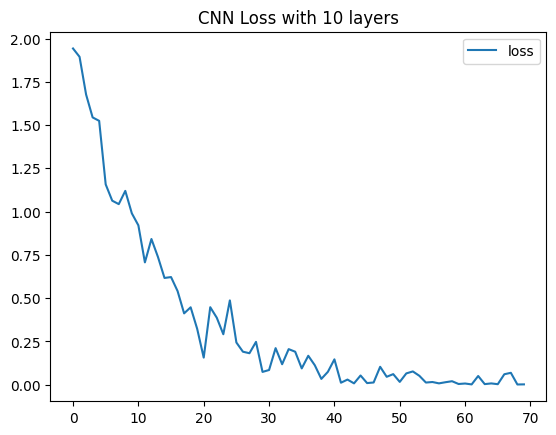

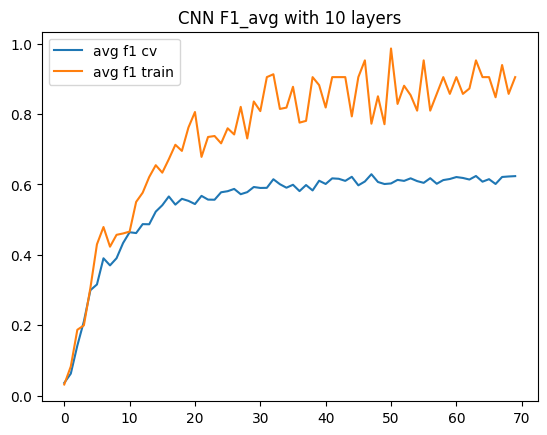

In [194]:

f1_train_list_cpu = [[torch.Tensor.cpu(item) for item in _list] for _list in f1_train_list_list]

loss_list_np = np.array(loss_list_list)
f1_list_np = np.array(f1_list_list)
f1_train_list_np = np.array(f1_train_list_cpu)
print(loss)
loss_list_avg = np.average(loss_list_np,axis = 0)
f1_list_avg = np.average(f1_list_np,axis = 0)
f1_train_list_avg = np.average(f1_train_list_np,axis = 0)
print(loss_list_np.shape)
import matplotlib.pyplot as plt
plt.plot(loss_list_avg,label = 'loss')
plt.title("CNN Loss with 10 layers")
plt.legend()
plt.show()
plt.plot(f1_list_avg,label = 'avg f1 cv')
plt.plot(f1_train_list_avg,label = 'avg f1 train')
plt.legend()
plt.title("CNN F1_avg with 10 layers")
plt.show()

In [203]:
net = Net()
net.cuda()
print("CNN2D param count: " , count_parameters(net) )

CNN2D param count:  2834627


In [190]:
import torch.optim as optim



def train_fun(data_load_,test_data_):
    net = Net()
    net.cuda()
    data_load,test_data = data_loader(data_load_,test_data_)
    wights = torch.from_numpy(wight).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    loss_list = []
    f1_list = []
    f1_train_list = []
    for epoch in range(70):  # loop over the dataset multiple times

        running_loss = 0.0
        
        for i, data in enumerate(data_load):
            current_batch_size = len(data)
            # get the inputs; data is a list of [inputs, labels]
            inputs =data[:,:,:,:-1]
            # defining the targets
            labels,_ = torch.max(data[:,:,:,-1],dim = 2)
            labels = labels[:,0]
            labels = labels.int()
            labels = labels.numpy()
            del(data)
            targets = torch.zeros([current_batch_size,7])
            ones = torch.ones([current_batch_size]).bool
            for i_2,label in enumerate(labels):
                targets[i_2,label] =1.0
            #print(targets)
            #targets = targets.type(torch.LongTensor)
            #print(labels)
            (inputs, targets) = (inputs.to(device), targets.to(device))
            # zero the parameter gradients
            
            #print(torch.cuda.memory_allocated() / torch.cuda.max_memory_allocated())
            #continue    
            # forward + backward + optimize#
            

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            loss.backward()    
            optimizer.step()
            optimizer.zero_grad()
            
            
            _, Maxs_out_i = torch.max(outputs, dim=1)
            
            # print statistics
            running_loss += loss.item()
            
            preds = torch.zeros([current_batch_size,7])
            preds = preds.to(device)
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1.0

    
            if i % 50 == 0:    # print every 5 mini-batches
                _,_,_,f1_train = eval_fun(preds,targets)
                f1_train = f1_train.mean()
                f1 = eval_test(net,test_data)
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss :.3f} f1_train : {f1_train:.5f} f1: {f1:.5f} ')
                loss_list.append(running_loss)
                f1_list.append(f1)
                f1_train_list.append(f1_train)
                #print (f'outputs{nn.Softmax( outputs)}')
                running_loss = 0.0

    print('Finished Training')
    return loss_list ,f1_list ,f1_train_list


In [419]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#X_train, X_test, y_train, y_test = train_test_split(final_data_reshaped[:,:,:,:-1],final_data_reshaped[:,:,:,-1],test_size=0.2)
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
loss_list = []
f1_list = []
f1_train_list = []
for train, test in kfold.split(final_data_reshaped):
    #print(final_data_reshaped[train].shape)
    #break
    running_loss,f1,f1_train = train_fun(final_data_reshaped[train], final_data_reshaped[test])
    loss_list.append(running_loss)
    f1_list.append(f1)
    f1_train_list.append(f1_train)

TypeError: eval_test() takes 1 positional argument but 2 were given

In [14]:
torch.cuda.memory_allocated() /torch.cuda.max_memory_allocated() 

0.6706121791652475

In [130]:
torch.cuda.empty_cache()

In [27]:
data = next(iter(valDataLoader))
current_batch_size = len(data)
inputs =data[:,:,:,:-1]
inputs = torch.transpose(inputs[:,0,:,:],1,2)
print(inputs.size())
# defining the targets
labels,_ = torch.max(data[:,:,:,-1],dim = 2)

#print("_labels",labels)
labels = labels[:,0]
labels = labels.int()
labels = labels.numpy()
#print(labels)
targets = torch.zeros([current_batch_size,7]) 
preds = torch.zeros([current_batch_size,7])
for i_2,label in enumerate(labels):
    targets[i_2,label] =1.0
(inputs, targets , preds) = (inputs.to(device), targets.to(device),preds.to(device)) 

out = net(inputs)
#out = nn.Softmax(out)
_,Maxs_out_i= torch.max(out,dim = 1)
print(Maxs_out_i)
Maxs_out_i = Maxs_out_i.int().cpu()
Maxs_out_i = Maxs_out_i.numpy()
print(Maxs_out_i)
for i_2,Max_out_i in enumerate(Maxs_out_i):
    preds[i_2,Max_out_i] =1.0
print(preds,targets)

torch.Size([20, 415, 100])


RuntimeError: input.size(-1) must be equal to input_size. Expected 415, got 100

tensor(1.2940, device='cuda:0', grad_fn=<DivBackward1>)
(5, 70)


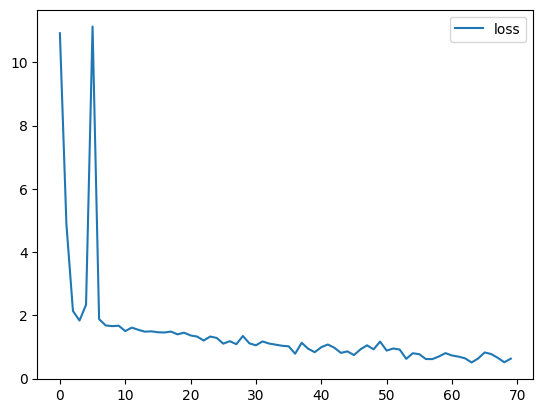

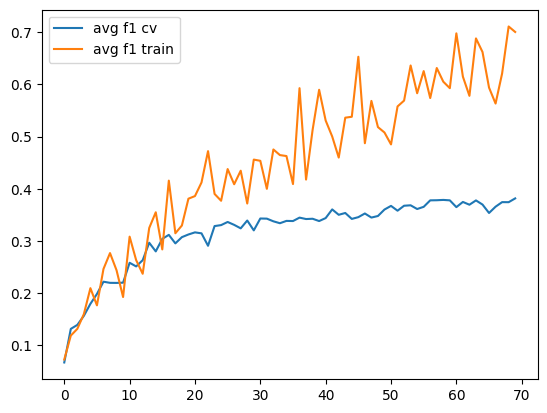

In [431]:

f1_train_list_cpu = [[torch.Tensor.cpu(item) for item in _list] for _list in f1_train_list_list]

loss_list_np = np.array(loss_list_list)
f1_list_np = np.array(f1_list_list)
f1_train_list_np = np.array(f1_train_list_cpu)
print(loss)
loss_list_avg = np.average(loss_list_np,axis = 0)
f1_list_avg = np.average(f1_list_np,axis = 0)
f1_train_list_avg = np.average(f1_train_list_np,axis = 0)
print(loss_list_np.shape)
import matplotlib.pyplot as plt
plt.plot(loss_list_avg,label = 'loss')
plt.legend()
plt.show()
plt.plot(f1_list_avg,label = 'avg f1 cv')
plt.plot(f1_train_list_avg,label = 'avg f1 train')
plt.legend()
plt.show()

In [192]:
print("CNN2D param count: " , count_parameters(net) )

CNN2D param count:  2834627


cnn with reduced data

In [182]:
def eval_test(model) :
    f1_list = np.array([]) 
    acc_list = np.array([]) 
    for i, data in enumerate(valDataLoader):
            # get the inputs; data is a list of [inputs, labels]
            current_batch_size = len(data)
            inputs =data[:,:,:,:-1]
            
            #mel data inputs
            mel_data = torch.zeros([current_batch_size,3,100,60])
            mel_data[:,0,:,:] = inputs[:,0,:,15:75]
            mel_data[:,1,:,:] = inputs[:,0,:,151:211]
            mel_data[:,2,:,:] = inputs[:,0,:,211:271]
            
            #mfcc data inputs
            mfcc_data = torch.zeros([current_batch_size,9,100,20])
            mfcc_data[:,0,:,:] = inputs[:,0,:,75:95]
            mfcc_data[:,1,:,:] = inputs[:,0,:,95:115]
            mfcc_data[:,2,:,:] = inputs[:,0,:,115:135]
            mfcc_data[:,3,:,:] = inputs[:,0,:,271:291]
            mfcc_data[:,4,:,:] = inputs[:,0,:,291:311]
            mfcc_data[:,5,:,:] = inputs[:,0,:,311:331]
            mfcc_data[:,6,:,:] = inputs[:,0,:,331:351]
            mfcc_data[:,7,:,:] = inputs[:,0,:,351:371]
            mfcc_data[:,8,:,:] = inputs[:,0,:,371:391]
            # other features inputs
            feature_input = torch.zeros([current_batch_size,100,55])
            feature_input[:,:,:15] = inputs[:,0,:,:15]
            feature_input[:,:,15:31] = inputs[:,0,:,135:151]
            feature_input[:,:,31:] = inputs[:,0,:,391:]
            # defining the targets
            labels_ = data[:,:,:,-1]
            # labels_ = labels_.squeeze()
            labels,_ = torch.max(data[:,:,:,-1],dim = 2)
            # labels = torch.stack([torch.count_nonzero(labels_ == i,dim = 1) for i in range(7)]).T
            
            # for i_1 in range(current_batch_size):
            #     if labels[i_1,0]>90 :
            #         labels[i_1,0] = 0
            #     else:
            #         #print(labels_.size())
            #         labels[i_1,0] = torch.max(labels_[i_1])
            #         #print(labels_2[i_1,0] )
            # #labels = labels[:,0]
            # #print(labels)
            # #break
            # #print("_labels",labels)
            labels = labels[:,0]
            labels = labels.int()
            labels = labels.numpy()
            #print(labels)
            targets = torch.zeros([current_batch_size,7]) 
            preds = torch.zeros([current_batch_size,7]) 
            for i_2,label in enumerate(labels):
                targets[i_2,label] =1.0
            #targets = targets.type(torch.LongTensor)
            #print(labels)
            
            (mel_data,mfcc_data,feature_input, targets,preds) = (mel_data.to(device),mfcc_data.to(device),feature_input.to(device), targets.to(device),preds.to(device))

           # print(inputs.get_device())
           
            outputs = model(mel_data,mfcc_data,feature_input)
            # forward + backward + optimize
            # zero the parameter gradients
            
            _,Maxs_out_i= torch.max(outputs,dim = 1)
            Maxs_out_i = Maxs_out_i.int().cpu()
            Maxs_out_i = Maxs_out_i.numpy()
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1.0
            
            targets = targets.bool()
            preds = preds.bool()
            #targets = targets.cpu().numpy()
            #preds = preds.cpu().numpy()
            #print(targets.dtype)
            # print statistics
            #targets = targets.type('torch.BoolTensor')
            #preds = preds.type('torch.BoolTensor')
            #print(inputs.get_device(),preds.get_device(),targets.get_device())
            acc,recall,prec,f1 = eval_fun(preds,targets)
            #print(preds,targets)

            acc = acc.mean()
            f1 = f1.mean()
            #print("f1__",f1.size())
            acc_list = np.append(acc_list,acc.cpu().numpy())
            f1_list = np.append(f1_list,f1.cpu().numpy())
            del(outputs)
    return acc_list.mean(),f1_list.mean()

In [187]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn1 = nn.Sequential(
            nn.Conv2d(3, 16, 3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 22, 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(22, 22, 3),
            nn.BatchNorm2d(22),
            nn.ReLU(),
            nn.Conv2d(22, 22, 3),
            nn.BatchNorm2d(22),
            nn.ReLU(),
            nn.Conv2d(22, 16, 3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, 3)
        )        
        self.cnn2 = nn.Sequential(
            nn.Conv2d(9, 30, 3),
            nn.BatchNorm2d(30),
            nn.ReLU(),
            #nn.MaxPool2d(2),
            nn.Conv2d(30, 30, 3),
            nn.ReLU(),
            nn.Conv2d(30, 30, 3),
            nn.BatchNorm2d(30),
            nn.ReLU(),
            nn.Conv2d(30, 30, 3),
            nn.BatchNorm2d(30),
            nn.ReLU(),
            nn.Conv2d(30, 30, 3),
            nn.BatchNorm2d(30),
            nn.ReLU(),
            nn.Conv2d(30, 15, 3),
            nn.BatchNorm2d(15),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(15, 6, 3)
        )
        self.cnn1d = nn.Sequential(
            nn.Conv1d(55, 55, 3),
            nn.BatchNorm1d(55),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(55, 55, 3),
            nn.ReLU(),
            #nn.MaxPool1d(2),
            nn.Conv1d(55, 55, 3),
            nn.ReLU(),
            #nn.MaxPool1d(2),
            nn.Conv1d(55, 25, 3),
            nn.BatchNorm1d(25),
            nn.ReLU(),
            nn.Conv1d(25, 25, 3),
            nn.BatchNorm1d(25),
            nn.ReLU(),
            #nn.MaxPool1d(2),
            nn.Conv1d(25, 8, 3)
        )
        self.fnn = nn.Sequential(
            nn.ReLU(),
            nn.Linear(816, 600),
            nn.ReLU(),
            nn.Linear(600, 400),
            nn.ReLU(),
            nn.Linear(400, 200),
            nn.ReLU(),
            nn.BatchNorm1d(200),
            nn.Linear(200, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 25),
            nn.ReLU(),
            nn.Linear(25, 7)
        )

    def forward(self,mel_data,mfcc_data,feature_input):
        mel_data = torch.nn.functional.normalize(mel_data)
        mfcc_data = torch.nn.functional.normalize(mfcc_data)
        feature_input = torch.nn.functional.normalize(feature_input)
        
        x1 = self.cnn1(mel_data)
        x1 = torch.flatten(x1, 1)
        
        x2 = self.cnn2(mfcc_data)
        x2 = torch.flatten(x2, 1)
        
        x3 = torch.transpose(feature_input,1,2)
        x3 = self.cnn1d(x3)
        x3 = torch.flatten(x3, 1)
        #x = x2
        x = torch.cat((x2,x3),-1)
        x = torch.nn.functional.normalize(x)
        x = self.fnn(x)
        return x



In [188]:
import torch.optim as optim


net = Net()
net.cuda()

wights = torch.from_numpy(wight).to(device)
criterion = nn.CrossEntropyLoss(weight=wights)
optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_list = []
acc_list = []
f1_list = []
f1_train_list = []
for epoch in range(90):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainDataLoader):
        current_batch_size = len(data)
        # get the inputs; data is a list of [inputs, labels]

        inputs =data[:,:,:,:-1]
        
        #mel data inputs
        mel_data = torch.zeros([current_batch_size,3,100,60])
        mel_data[:,0,:,:] = inputs[:,0,:,15:75]
        mel_data[:,1,:,:] = inputs[:,0,:,151:211]
        mel_data[:,2,:,:] = inputs[:,0,:,211:271]
        
        #mfcc data inputs
        mfcc_data = torch.zeros([current_batch_size,9,100,20])
        mfcc_data[:,0,:,:] = inputs[:,0,:,75:95]
        mfcc_data[:,1,:,:] = inputs[:,0,:,95:115]
        mfcc_data[:,2,:,:] = inputs[:,0,:,115:135]
        mfcc_data[:,3,:,:] = inputs[:,0,:,271:291]
        mfcc_data[:,4,:,:] = inputs[:,0,:,291:311]
        mfcc_data[:,5,:,:] = inputs[:,0,:,311:331]
        mfcc_data[:,6,:,:] = inputs[:,0,:,331:351]
        mfcc_data[:,7,:,:] = inputs[:,0,:,351:371]
        mfcc_data[:,8,:,:] = inputs[:,0,:,371:391]
        # other features inputs
        feature_input = torch.zeros([current_batch_size,100,55])
        feature_input[:,:,:15] = inputs[:,0,:,:15]
        feature_input[:,:,15:31] = inputs[:,0,:,135:151]
        feature_input[:,:,31:] = inputs[:,0,:,391:]
        
        
        labels_ = data[:,:,:,-1]
        # defining the targets
        # del(labels)
        # labels_ = data[:,:,:,-1]
        # labels_ = labels_.squeeze()
        labels,_ = torch.max(data[:,:,:,-1],dim = 2)
        # labels = torch.stack([torch.count_nonzero(labels_ == i,dim = 1) for i in range(7)]).T
        
        # for i_1 in range(current_batch_size):
        #     if labels[i_1,0]>90 :
        #         labels[i_1,0] = 0
        #     else:
        #         #print(labels_.size())
        #         labels[i_1,0] = torch.max(labels_[i_1])
        #         #print(labels_2[i_1,0] )
        # #labels = labels[:,0]
        # #print(labels)
        # #break
    
        labels = labels[:,0]
        labels = labels.int()
        labels = labels.numpy()
        del(data)
        targets = torch.zeros([current_batch_size,7])
        ones = torch.ones([current_batch_size]).bool
        for i_2,label in enumerate(labels):
            targets[i_2,label] =1.0
        #print(targets)
        #targets = targets.type(torch.LongTensor)
        #print(labels)
        (mel_data,mfcc_data,feature_input, targets) = (mel_data.to(device),mfcc_data.to(device),feature_input.to(device), targets.to(device))
        # zero the parameter gradients
        
        #print(torch.cuda.memory_allocated() / torch.cuda.max_memory_allocated())
        #continue    
        # forward + backward + optimize#
        

        optimizer.zero_grad()
        #input_list = torch.tensor([mel_data,mfcc_data,feature_input])
        outputs = net(mel_data,mfcc_data,feature_input)
        #break
        loss = criterion(outputs, targets)
        loss.backward()    
        optimizer.step()
        optimizer.zero_grad()
        
        
        _, Maxs_out_i = torch.max(outputs, dim=1)
        
        # print statistics
        running_loss += loss.item()
        
        preds = torch.zeros([current_batch_size,7])
        preds = preds.to(device)
        for i_2,Max_out_i in enumerate(Maxs_out_i):
            preds[i_2,Max_out_i] =1.0

 
        if i % 50 == 0:    # print every 5 mini-batches
            _,_,_,f1_train = eval_fun(preds,targets)
            f1_train = f1_train.mean()
            acc,f1 = eval_test(net)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss :.3f} f1_train : {f1_train:.5f} f1: {f1:.5f} acc:{acc}')
            loss_list.append(running_loss)
            f1_list.append(f1)
            f1_train_list.append(f1_train)
            acc_list.append(acc)
            #print (f'outputs{nn.Softmax( outputs)}')
            running_loss = 0.0

print('Finished Training')


[1,     1] loss: 15.902 f1_train : 0.01681 f1: 0.00673 acc:0.7214285910129548
[2,     1] loss: 9.611 f1_train : 0.35331 f1: 0.24342 acc:0.81726194024086
[3,     1] loss: 14.137 f1_train : 0.40108 f1: 0.37154 acc:0.848809564113617
[4,     1] loss: 7.422 f1_train : 0.65538 f1: 0.47205 acc:0.8770833671092987
[5,     1] loss: 3.035 f1_train : 0.79971 f1: 0.49359 acc:0.8851190805435181
[6,     1] loss: 4.105 f1_train : 0.66479 f1: 0.45589 acc:0.8636905133724213
[7,     1] loss: 6.136 f1_train : 0.52265 f1: 0.53724 acc:0.8904762208461762
[8,     1] loss: 6.353 f1_train : 0.69943 f1: 0.54292 acc:0.9002976536750793
[9,     1] loss: 2.943 f1_train : 0.66796 f1: 0.56908 acc:0.9029762268066406
[10,     1] loss: 1.950 f1_train : 0.88924 f1: 0.58023 acc:0.9071428894996643
[11,     1] loss: 0.931 f1_train : 0.85714 f1: 0.59667 acc:0.9139881312847138
[12,     1] loss: 0.476 f1_train : 0.97119 f1: 0.59068 acc:0.9086309850215912
[13,     1] loss: 2.217 f1_train : 0.66408 f1: 0.57771 acc:0.9130952715873


(dot.exe:25324): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


RNN param count:  938621


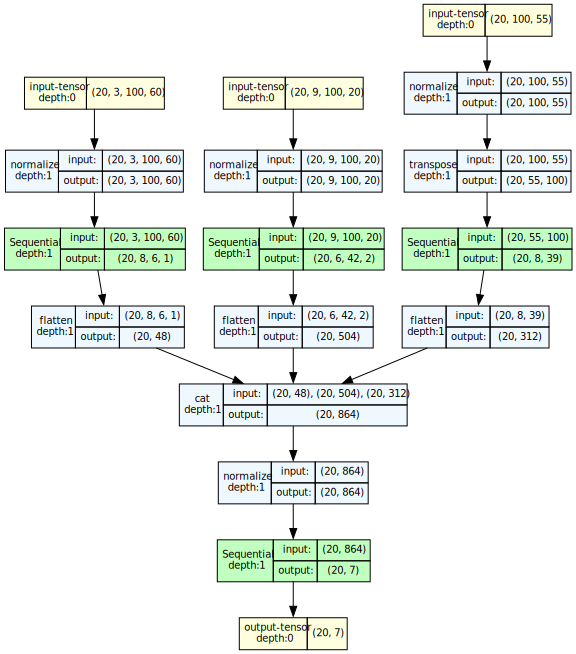

In [79]:
from torchview import draw_graph

net = Net()
print("RNN param count: " , count_parameters(net) )
#print(net)


# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(net, input_size=((current_batch_size,3,100,60),(current_batch_size,9,100,20),(current_batch_size,100,55)),depth=1, expand_nested=True)
model_graph.visual_graph

In [80]:
loss_list_list = []
f1_list_list= []
f1_train_list_list= []

In [81]:
loss_list_list.append(loss_list)
f1_list_list.append(f1_list)
f1_train_list_list.append(f1_train_list)

In [82]:
loss_list_list_2 = []
f1_list_list_2= []
f1_train_list_list_2= []

In [83]:
loss_list_list_2.append(loss_list)
f1_list_list_2.append(f1_list)
f1_train_list_list_2.append(f1_train_list)

f1_train_list_cpu_2 = [[torch.Tensor.cpu(item) for item in _list] for _list in f1_train_list_list_2]

loss_list_np_2 = np.array(loss_list_list_2)
f1_list_np_2 = np.array(f1_list_list_2)
f1_train_list_np_2 = np.array(f1_train_list_cpu_2)

loss_list_avg_2 = np.average(loss_list_np_2,axis = 0)
f1_list_avg_2 = np.average(f1_list_np_2,axis = 0)
f1_train_list_avg_2 = np.average(f1_train_list_np_2,axis = 0)

In [84]:
loss_list_list_3 = []
f1_list_list_3= []
f1_train_list_list_3= []

In [85]:
loss_list_list_3.append(loss_list)
f1_list_list_3.append(f1_list)
f1_train_list_list_3.append(f1_train_list)

f1_train_list_cpu_3 = [[torch.Tensor.cpu(item) for item in _list] for _list in f1_train_list_list_3]

loss_list_np_3 = np.array(loss_list_list_3)
f1_list_np_3 = np.array(f1_list_list_3)
f1_train_list_np_3 = np.array(f1_train_list_cpu_3)

loss_list_avg_3 = np.average(loss_list_np_3,axis = 0)
f1_list_avg_3 = np.average(f1_list_np_3,axis = 0)
f1_train_list_avg_3 = np.average(f1_train_list_np_3,axis = 0)

tensor(0.0203, device='cuda:0', dtype=torch.float64, grad_fn=<DivBackward1>)
(1, 120)


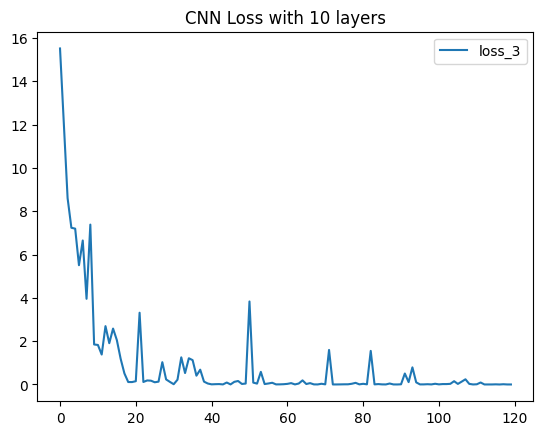

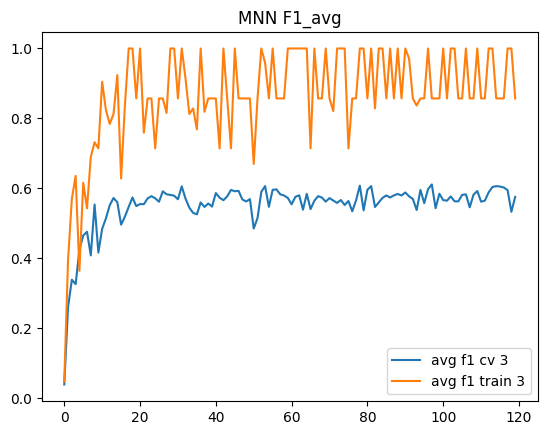

In [86]:

f1_train_list_cpu = [[torch.Tensor.cpu(item) for item in _list] for _list in f1_train_list_list]

loss_list_np = np.array(loss_list_list)
f1_list_np = np.array(f1_list_list)
f1_train_list_np = np.array(f1_train_list_cpu)
print(loss)
loss_list_avg = np.average(loss_list_np,axis = 0)
f1_list_avg = np.average(f1_list_np,axis = 0)
f1_train_list_avg = np.average(f1_train_list_np,axis = 0)
print(loss_list_np.shape)
import matplotlib.pyplot as plt
#plt.plot(loss_list_avg,label = 'loss')
#plt.plot(loss_list_avg_2,label = 'loss_2')
plt.plot(loss_list_avg_3,label = 'loss_3')
plt.title("CNN Loss with 10 layers")
plt.legend()
plt.show()
#plt.plot(f1_list_avg,label = 'avg f1 cv')
#plt.plot(f1_list_avg_2,label = 'avg f1 cv 2')
plt.plot(f1_list_avg_3,label = 'avg f1 cv 3')
#plt.plot(f1_train_list_avg,label = 'avg f1 train')
#plt.plot(f1_train_list_avg_2,label = 'avg f1 train 2')
plt.plot(f1_train_list_avg_3,label = 'avg f1 train 3')
plt.legend()
plt.title("MNN F1_avg")
plt.show()

CNN 1D

In [222]:
class Net(torch.nn.Module):
    """#
    Dense feed-forward network tailored to process latch sequence data.
    """
    
    def __init__(self ):
        super().__init__()
        num_instance = 100
        num_features = 415
        num_hidden_layers = 500
        hidden_channels = 3
        kernel_size = 3
        input_channels = 415
        num_classes = 7
        use_batchnormalization = False
        activation_function = nn.ReLU()
        hidden_list = []
        for _ in range(0):
            layer = nn.Conv1d(in_channels=input_channels, out_channels=hidden_channels, kernel_size=kernel_size,padding=kernel_size//2)
            hidden_list.append(layer)
            if use_batchnormalization :
                hidden_list.append(nn.BatchNorm1d(hidden_channels))
            hidden_list.append(activation_function)
            input_channels = hidden_channels
            
         # cnn layer   
        cnn1 = nn.Conv1d(in_channels=input_channels, out_channels=700, kernel_size=kernel_size,padding=kernel_size//2)
        cnn2 = nn.Conv1d(in_channels=700, out_channels=400, kernel_size=kernel_size,padding=kernel_size//2)
        cnn3 = nn.Conv1d(in_channels=400, out_channels=300, kernel_size=kernel_size,padding=kernel_size//2)
        cnn4 = nn.Conv1d(in_channels=300, out_channels=200, kernel_size=kernel_size,padding=kernel_size//2)
        cnn5 = nn.Conv1d(in_channels=200, out_channels=100, kernel_size=kernel_size,padding=kernel_size//2)
        cnn6 = nn.Conv1d(in_channels=100, out_channels=100, kernel_size=kernel_size,padding=kernel_size//2)
        cnn7 = nn.Conv1d(in_channels=100, out_channels=50, kernel_size=kernel_size,padding=kernel_size//2)
        
        
        # fnn layers
        flat = nn.Flatten()
        fc1 = nn.Linear(50*(100//(2*2*2)),300)
        fc2 = nn.Linear(300,150)
        fc3 = nn.Linear(150, 84)
        fc4 = nn.Linear(84, 40)
        fc5 = nn.Linear(40, 7)
        
        # append cnn 
        hidden_list.append(cnn1)
        hidden_list.append(nn.BatchNorm1d(700))
        hidden_list.append(activation_function)
        hidden_list.append(nn.MaxPool1d(2))
        
        hidden_list.append(cnn2)
        #hidden_list.append(nn.BatchNorm1d(400))
        hidden_list.append(activation_function)
        #hidden_list.append(nn.MaxPool1d(2))
        
        hidden_list.append(cnn3)
        hidden_list.append(nn.BatchNorm1d(300))
        hidden_list.append(activation_function)
        hidden_list.append(nn.MaxPool1d(2))
        
        hidden_list.append(cnn4)
        #hidden_list.append(nn.BatchNorm1d(200))
        hidden_list.append(activation_function)
        
        hidden_list.append(cnn5)
        hidden_list.append(nn.BatchNorm1d(100))
        hidden_list.append(activation_function)
        hidden_list.append(nn.MaxPool1d(2))
        
        hidden_list.append(cnn6)
        #hidden_list.append(nn.BatchNorm1d(50))
        hidden_list.append(activation_function)
        #hidden_list.append(nn.MaxPool1d(2))
        
        hidden_list.append(cnn7)
        hidden_list.append(nn.BatchNorm1d(50))
        hidden_list.append(activation_function)
        
        #append flatten
        
        hidden_list.append(flat)
        hidden_list.append(fc1)
        hidden_list.append(activation_function)
        hidden_list.append(fc2)
        hidden_list.append(activation_function)
        hidden_list.append(fc3)
        hidden_list.append(activation_function)
        hidden_list.append(fc4)
        hidden_list.append(activation_function)
        hidden_list.append(fc5)

        
        self.layers = nn.Sequential(*hidden_list)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = torch.transpose(x,1,2)
        x = self.layers(x)
        return x
    


In [205]:
def eval_test(model) :
    f1_list = np.array([]) 
    for i, data in enumerate(valDataLoader):
            # get the inputs; data is a list of [inputs, labels]
            current_batch_size = len(data)
            inputs =data[:,:,:,:-1]
            
            inputs = inputs[:,0,:,:]
            # defining the targets
            labels,_ = torch.max(data[:,:,:,-1],dim = 2)
            
            #print("_labels",labels)
            labels = labels[:,0]
            labels = labels.int()
            labels = labels.numpy()
            #print(labels)
            targets = torch.zeros([current_batch_size,7]) 
            preds = torch.zeros([current_batch_size,7]) 
            for i_2,label in enumerate(labels):
                targets[i_2,label] =1.0
            #targets = targets.type(torch.LongTensor)
            #print(labels)

            (inputs, targets,preds) = (inputs.to(device), targets.to(device),preds.to(device))
           # print(inputs.get_device())
           
            optimizer.zero_grad()
            outputs = model(inputs)
            # forward + backward + optimize
            # zero the parameter gradients
            
            _,Maxs_out_i= torch.max(outputs,dim = 1)
            Maxs_out_i = Maxs_out_i.int().cpu()
            Maxs_out_i = Maxs_out_i.numpy()
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1.0
            
            targets = targets.bool()
            preds = preds.bool()
            #targets = targets.cpu().numpy()
            #preds = preds.cpu().numpy()
            #print(targets.dtype)
            # print statistics
            #targets = targets.type('torch.BoolTensor')
            #preds = preds.type('torch.BoolTensor')
            #print(inputs.get_device(),preds.get_device(),targets.get_device())
            acc,recall,prec,f1 = eval_fun(preds,targets)
            #print(preds,targets)

            f1 = f1.mean()
            #print("f1__",f1.size())
            f1_list = np.append(f1_list,f1.cpu().numpy())
            del(outputs)
    return f1_list.mean()

In [234]:
import torch.optim as optim


net = Net()
net.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_list = []
acc_list = []
f1_list = []
f1_train_list = []
for epoch in range(70):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainDataLoader):
        current_batch_size = len(data)
        # get the inputs; data is a list of [inputs, labels]
        inputs =data[:,:,:,:-1]
        
        inputs = inputs[:,0,:,:]
        # defining the targets
        labels,_ = torch.max(data[:,:,:,-1],dim = 2)
        labels = labels[:,0]
        labels = labels.int()
        labels = labels.numpy()
        del(data)
        targets = torch.zeros([current_batch_size,7])
        ones = torch.ones([current_batch_size]).bool
        for i_2,label in enumerate(labels):
            targets[i_2,label] =1.0
        #print(targets)
        #targets = targets.type(torch.LongTensor)
        #print(labels)
        (inputs, targets) = (inputs.to(device), targets.to(device))
        # zero the parameter gradients
        
        #print(torch.cuda.memory_allocated() / torch.cuda.max_memory_allocated())
        #continue    
        # forward + backward + optimize#
        #print(inputs.shape)
        #break

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()    
        optimizer.step()
        
        
        _, Maxs_out_i = torch.max(outputs, dim=1)
        
        # print statistics
        running_loss += loss.item()
        
        preds = torch.zeros([current_batch_size,7])
        preds = preds.to(device)
        for i_2,Max_out_i in enumerate(Maxs_out_i):
            preds[i_2,Max_out_i] =1.0

 
        if i % 50 == 0:    # print every 5 mini-batches
            _,_,_,f1_train = eval_fun(preds,targets)
            f1_train = f1_train.mean()
            f1 = eval_test(net)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss :.3f} f1_train : {f1_train:.5f} f1: {f1:.5f} ')
            loss_list.append(running_loss)
            f1_list.append(f1)
            f1_train_list.append(f1_train)
            #print (f'outputs{nn.Softmax( outputs)}')
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 1.921 f1_train : 0.04762 f1: 0.04208 
[2,     1] loss: 1.770 f1_train : 0.08163 f1: 0.10614 
[3,     1] loss: 1.812 f1_train : 0.10575 f1: 0.10790 
[4,     1] loss: 1.905 f1_train : 0.14935 f1: 0.11427 
[5,     1] loss: 2.011 f1_train : 0.03571 f1: 0.16693 
[6,     1] loss: 1.708 f1_train : 0.14000 f1: 0.13186 
[7,     1] loss: 1.622 f1_train : 0.18562 f1: 0.16722 
[8,     1] loss: 1.834 f1_train : 0.14002 f1: 0.17917 
[9,     1] loss: 1.717 f1_train : 0.14603 f1: 0.20557 
[10,     1] loss: 1.614 f1_train : 0.11973 f1: 0.18004 
[11,     1] loss: 1.366 f1_train : 0.27857 f1: 0.22481 
[12,     1] loss: 1.801 f1_train : 0.08844 f1: 0.21262 
[13,     1] loss: 1.627 f1_train : 0.28545 f1: 0.19365 
[14,     1] loss: 1.614 f1_train : 0.36861 f1: 0.24679 
[15,     1] loss: 1.692 f1_train : 0.16190 f1: 0.21909 
[16,     1] loss: 1.753 f1_train : 0.14493 f1: 0.25082 
[17,     1] loss: 1.695 f1_train : 0.11441 f1: 0.22679 
[18,     1] loss: 1.440 f1_train : 0.44762 f1: 0.23369 
[

In [225]:
loss_list_list = []
f1_list_list= []
f1_train_list_list= []

In [235]:
loss_list_list.append(loss_list)
f1_list_list.append(f1_list)
f1_train_list_list.append(f1_train_list)

(4, 70)
(4, 70)


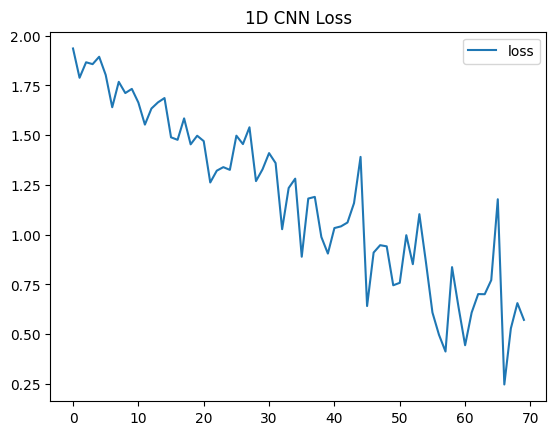

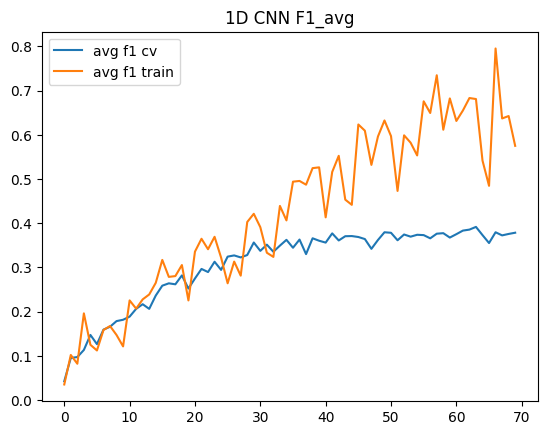

In [237]:

f1_train_list_cpu = [[torch.Tensor.cpu(item) for item in _list] for _list in f1_train_list_list]

loss_list_np = np.array(loss_list_list)
f1_list_np = np.array(f1_list_list)
f1_train_list_np = np.array(f1_train_list_cpu)
print(loss_list_np.shape)
loss_list_avg = np.average(loss_list_np,axis = 0)
f1_list_avg = np.average(f1_list_np,axis = 0)
f1_train_list_avg = np.average(f1_train_list_np,axis = 0)
print(loss_list_np.shape)
import matplotlib.pyplot as plt
plt.plot(loss_list_avg,label = 'loss')
plt.title("1D CNN Loss")
plt.legend()
plt.show()
plt.plot(f1_list_avg,label = 'avg f1 cv')
plt.plot(f1_train_list_avg,label = 'avg f1 train')
plt.legend()
plt.title("1D CNN F1_avg")
plt.show()

In [58]:
data = next(iter(valDataLoader))
current_batch_size = len(data)
inputs =data[:,:,:,:-1]
inputs = inputs[:,0,:,:]
print(inputs.size())
# defining the targets
labels,_ = torch.max(data[:,:,:,-1],dim = 2)

#print("_labels",labels)
labels = labels[:,0]
labels = labels.int()
labels = labels.numpy()
#print(labels)
targets = torch.zeros([current_batch_size,7]) 
preds = torch.zeros([current_batch_size,7])
for i_2,label in enumerate(labels):
    targets[i_2,label] =1.0
(inputs, targets , preds) = (inputs.to(device), targets.to(device),preds.to(device)) 

out = net(inputs)
#out = nn.Softmax(out)
_,Maxs_out_i= torch.max(out,dim = 1)
print(Maxs_out_i)
Maxs_out_i = Maxs_out_i.int().cpu()
Maxs_out_i = Maxs_out_i.numpy()
print(Maxs_out_i)
for i_2,Max_out_i in enumerate(Maxs_out_i):
    preds[i_2,Max_out_i] =1.0
print(preds,targets)
print(out)

torch.Size([18, 100, 415])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.]], device='cuda:0') tensor([[0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
 

RNN

In [16]:
#split to train / validate

# define the train and val splits
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT

numTrainSamples = int(len(final_data_reshaped) * TRAIN_SPLIT)
numValSamples = int(len(final_data_reshaped) * VAL_SPLIT)
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
(trainData, valData) = torch.utils.data.random_split(final_data_reshaped,[numTrainSamples, numValSamples],generator=torch.Generator().manual_seed(42))

INIT_LR = 1e-3
BATCH_SIZE = 20
EPOCHS = 20

#trainData    = torch.utils.data.TensorDataset(torch.tensor(trainData).to(device), torch.tensor(trainData).to(device))
#valData    = torch.utils.data.TensorDataset(torch.tensor(valData).to(device), torch.tensor(valData).to(device))


trainDataLoader = torch.utils.data.DataLoader(trainData, shuffle=True,batch_size=BATCH_SIZE)
valDataLoader = torch.utils.data.DataLoader(valData, batch_size=BATCH_SIZE)
# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE

In [15]:
class Net(torch.nn.Module):
    """#
    Dense feed-forward network tailored to process latch sequence data.
    """
    
    def __init__(self ):
        super().__init__()
        kernel = 5
        num_instance = 100
        self.num_features = 415
        self.hidden_size = 500
        self.num_layers = 60
        self.rnn1 = nn.RNN(input_size=self.num_features, hidden_size=self.hidden_size, num_layers = self.num_layers, batch_first=True)
        #self.rnn2 = nn.RNN(input_size=self.rnn1.hidden_size, hidden_size=self.hidden_size, num_layers = self.num_layers, batch_first=True)
        self.fc1 = nn.Linear(self.rnn1.hidden_size, 500)
        self.fc2 = nn.Linear(500, 7)
        #self.fc3 = nn.Linear(300, 100)
        #self.fc4 = nn.Linear(100, 50)
        #self.fc5 = nn.Linear(50, 7)
        self.relu_1 = nn.ReLU()
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        
        #x = torch.nn.functional.normalize(x)
        h0 = torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)
        x,_ = self.rnn1(x,h0)
        #print(x.size())
        #x = self.rnn1(x)[1].squeeze()
        #x,_ =self.rnn2(x,h0)
        #print(x.shape)
        #x = x.reshape(x.shape[0],-1)
        #x = self.fc1(x[:, -1, :])
        #print(x.size())
        x = self.relu_1(x)
        #print(x.shape)
        #x = self.relu_1(self.fc2(x))
        #x = self.relu_1(self.fc3(x))
        #x = self.relu_1(self.fc4(x))
        return self.fc2(x)
    


In [17]:
def eval_test(model) :
    f1_list = np.array([]) 
    for i, data in enumerate(valDataLoader):
            # get the inputs; data is a list of [inputs, labels]
            current_batch_size = len(data)
            inputs =data[:,:,:,:-1]
            
            inputs =inputs[:,0,:,:]
            # defining the targets
            labels,_ = torch.max(data[:,:,:,-1],dim = 2)
            
            #print("_labels",labels)
            labels = labels[:,0]
            labels = labels.int()
            labels = labels.numpy()
            #print(labels)
            targets = torch.zeros([current_batch_size,7]) 
            preds = torch.zeros([current_batch_size,7]) 
            for i_2,label in enumerate(labels):
                targets[i_2,label] =1.0
            #targets = targets.type(torch.LongTensor)
            #print(labels)
            
            (inputs, targets) = (inputs.to(device), targets.to(device))
           # print(inputs.get_device())
           
            optimizer.zero_grad()
            outputs = model(inputs)
            # forward + backward + optimize
            # zero the parameter gradients
 
            
            
            _,Maxs_out_i= torch.max(outputs,dim = 1)
            Maxs_out_i = Maxs_out_i.int().cpu()
            Maxs_out_i = Maxs_out_i.numpy()
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1
            preds = preds.to(device)
            targets = targets.bool()
            preds = preds.bool()
            #targets = targets.cpu().numpy()
            #preds = preds.cpu().numpy()
            #print(targets.dtype)
            # print statistics
            #targets = targets.type('torch.BoolTensor')
            #preds = preds.type('torch.BoolTensor')
            #print(inputs.get_device(),preds.get_device(),targets.get_device())
            acc,recall,prec,f1 = eval_fun(preds,targets)
            #print(preds,targets)

            f1 = f1.mean()
            #print("f1__",f1.size())
            f1_list = np.append(f1_list,f1.cpu().numpy())
            del(outputs)
            
    return f1_list.mean()

In [18]:
import torch.optim as optim


net = Net()
net.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_list = []
acc_list = []
f1_list = []
f1_train_list = []

optimizer.zero_grad()
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainDataLoader):
        current_batch_size = len(data)
        # get the inputs; data is a list of [inputs, labels]
        inputs =data[:,:,:,:-1]
        
        inputs = inputs[:,0,:,:]
        # defining the targets
        labels = data[:,:,:,-1]
        #labels,_ = torch.max(data[:,:,:,-1],dim = 2)
        #print(labels.size())
        labels = labels[:,0,:]
        #print(labels)
        #break
        labels = labels.int()
        labels = labels.numpy()
        targets = torch.zeros([labels.shape[0],labels.shape[1],7])
        for i_1,a_file in enumerate(labels):
            for i_2,label in enumerate(labels):
                targets[i_1,i_2,label] =1
            
            
        #print(targets.size())
        #targets = targets.type(torch.LongTensor)
        #print(labels)
        #print(inputs.size())
        #break
        (inputs, targets) = (inputs.to(device), targets.to(device))
        # zero the parameter gradients
        
        #print(torch.cuda.memory_allocated() / torch.cuda.max_memory_allocated())
        #continue    
        # forward + backward + optimize#
        

        outputs = net(inputs)
        print(inputs.size())
        print(outputs.size())
        #print(targets.size())
        break

        #(outputs, targets) = (outputs.type(torch.LongTensor), targets.type(torch.LongTensor))
        #targets = targets.type(torch.long)
        loss = criterion(outputs, targets)
        loss.backward()    
        optimizer.step()
        
        
        #print(outputs,targets.size())
        #break
        
        # print statistics
        running_loss += loss.item()
        


 
        if i % 50 == 0:    # print every 5 mini-batches
            #outputs = outputs[-1,:,:]
            _, Maxs_out_i = torch.max(outputs, dim=1)
            preds = torch.zeros([current_batch_size,7])
            #print(Maxs_out_i.shape)
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1.0
                
            preds = preds.to(device)
            _,_,_,f1_train = eval_fun(preds,targets)
            f1_train = f1_train.mean()
            f1 = eval_test(net)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss :.3f} f1_train : {f1_train:.5f} f1: {f1:.5f} ')
            loss_list.append(running_loss)
            f1_list.append(f1)
            f1_train_list.append(f1_train)
            #print (f'outputs{nn.Softmax( outputs)}')
            running_loss = 0.0

print('Finished Training')

torch.Size([20, 100, 415])
torch.Size([20, 100, 7])
Finished Training


RNN param count:  120039007
Net(
  (rnn1): RNN(415, 1000, num_layers=60, batch_first=True)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=7, bias=True)
  (relu_1): ReLU()
)



(dot.exe:29396): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


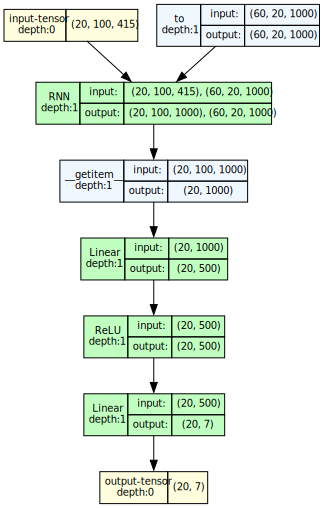

In [47]:
from torchview import draw_graph
print("RNN param count: " , count_parameters(net) )
print(net)


# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(net, input_size=(BATCH_SIZE, 100,415))
model_graph.visual_graph

In [37]:
data = next(iter(valDataLoader))
current_batch_size = len(data)
inputs =data[:,:,:,:-1]
inputs = inputs[:,0,:,:]
print(inputs.size())
# defining the targets
labels,_ = torch.max(data[:,:,:,-1],dim = 2)

#print("_labels",labels)
labels = labels[:,0]
labels = labels.int()
labels = labels.numpy()
#print(labels)
targets = torch.zeros([current_batch_size,7]) 
preds = torch.zeros([current_batch_size,7])
for i_2,label in enumerate(labels):
    targets[i_2,label] =1.0
(inputs, targets , preds) = (inputs.to(device), targets.to(device),preds.to(device)) 

out = net(inputs)
#out = nn.Softmax(out)
_,Maxs_out_i= torch.max(out,dim = 1)
print(Maxs_out_i)
Maxs_out_i = Maxs_out_i.int().cpu()
Maxs_out_i = Maxs_out_i.numpy()
print(Maxs_out_i)
for i_2,Max_out_i in enumerate(Maxs_out_i):
    preds[i_2,Max_out_i] =1.0
print(preds,targets)
print(out)

torch.Size([1, 100, 415])
tensor([2], device='cuda:0')
[2]
tensor([[0., 0., 1., 0., 0., 0., 0.]], device='cuda:0') tensor([[0., 0., 0., 0., 1., 0., 0.]], device='cuda:0')
tensor([[-1.1208,  0.2549,  0.2604,  0.1490,  0.1989,  0.0836,  0.2287]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


lstm

In [21]:

#split to train / validate
#split to train / validate
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT
print(final_data_reshaped.shape)
numTrainSamples = int(len(final_data_reshaped) * TRAIN_SPLIT)
numValSamples = int(len(final_data_reshaped) * VAL_SPLIT)
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

(trainData, valData) = torch.utils.data.random_split(final_data_reshaped,[numTrainSamples, numValSamples],generator=torch.Generator().manual_seed(42))
# define the train and val splits
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT
print(final_data_reshaped.shape)
numTrainSamples = int(len(final_data_reshaped) * TRAIN_SPLIT)
numValSamples = int(len(final_data_reshaped) * VAL_SPLIT)
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#(trainData, valData) = torch.utils.data.random_split(final_data_reshaped,[numTrainSamples, numValSamples],generator=torch.Generator().manual_seed(42))

INIT_LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 10

#trainData    = torch.utils.data.TensorDataset(torch.tensor(trainData).to(device), torch.tensor(trainData).to(device))
#valData    = torch.utils.data.TensorDataset(torch.tensor(valData).to(device), torch.tensor(valData).to(device))


trainDataLoader = torch.utils.data.DataLoader(trainData, shuffle=True,batch_size=BATCH_SIZE)
valDataLoader = torch.utils.data.DataLoader(valData, batch_size=BATCH_SIZE)
# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE


(1200, 1, 100, 416)
(1200, 1, 100, 416)


In [98]:
class Net(torch.nn.Module):
    """#
    Dense feed-forward network tailored to process latch sequence data.
    """
    
    def __init__(self ):
        super().__init__()
        kernel = 5
        num_instance = 100
        self.num_features = 415
        self.hidden_size = 600
        self.num_layers = 3
        self.lstm = nn.LSTM(input_size=self.num_features, hidden_size=self.hidden_size, num_layers = self.num_layers, batch_first=True)
        self.fc1 = nn.Linear(self.lstm.hidden_size, 500)
        self.fc2 = nn.Linear(500, 300)
        self.fc3 = nn.Linear(300, 100)
        self.fc4 = nn.Linear(100, 50)
        self.fc5 = nn.Linear(50, 7)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        x, _ = self.lstm(x, (h0, c0))  # shape = (batch_size, seq_length, hidden_size)
        x = torch.relu(self.fc1(x[:, -1, :]))
        #x = self.rnn1(x)[1][0].squeeze()
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.fc5(x)

In [95]:
def eval_test(model) :
    f1_list = np.array([]) 
    for i, data in enumerate(valDataLoader):
            # get the inputs; data is a list of [inputs, labels]
            current_batch_size = len(data)
            inputs =data[:,:,:,:-1]
            
            inputs =inputs[:,0,:,:]
            # defining the targets
            labels,_ = torch.max(data[:,:,:,-1],dim = 2)
            
            #print("_labels",labels)
            labels = labels[:,0]
            labels = labels.int()
            labels = labels.numpy()
            #print(labels)
            targets = torch.zeros([current_batch_size,7]) 
            preds = torch.zeros([current_batch_size,7]) 
            for i_2,label in enumerate(labels):
                targets[i_2,label] =1.0
            #targets = targets.type(torch.LongTensor)
            #print(labels)
            
            (inputs, targets) = (inputs.to(device), targets.to(device))
           # print(inputs.get_device())
           
            optimizer.zero_grad()
            outputs = model(inputs)
            # forward + backward + optimize
            # zero the parameter gradients
            
            _,Maxs_out_i= torch.max(outputs,dim = 1)
            Maxs_out_i = Maxs_out_i.int().cpu()
            Maxs_out_i = Maxs_out_i.numpy()
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1
            preds = preds.to(device)
            targets = targets.bool()
            preds = preds.bool()
            #targets = targets.cpu().numpy()
            #preds = preds.cpu().numpy()
            #print(targets.dtype)
            # print statistics
            #targets = targets.type('torch.BoolTensor')
            #preds = preds.type('torch.BoolTensor')
            #print(inputs.get_device(),preds.get_device(),targets.get_device())
            acc,recall,prec,f1 = eval_fun(preds,targets)
            #print(preds,targets)

            f1 = f1.mean()
            #print("f1__",f1.size())
            f1_list = np.append(f1_list,f1.cpu().numpy())
            del(outputs)
    return f1_list.mean()

In [100]:
import torch.optim as optim


#net = Net()
#net.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_list = []
acc_list = []
f1_list = []
f1_train_list = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainDataLoader):
        current_batch_size = len(data)
        # get the inputs; data is a list of [inputs, labels]
        inputs =data[:,:,:,:-1]

        
        inputs = inputs[:,0,:,:]
        # defining the targets
        labels,_ = torch.max(data[:,:,:,-1],dim = 2)
        labels = labels[:,0]
        labels = labels.int()
        labels = labels.numpy()
        del(data)
        targets = torch.zeros([current_batch_size,7])
        ones = torch.ones([current_batch_size]).bool
        for i_2,label in enumerate(labels):
            targets[i_2,label] =1
        #print(targets)
        #targets = targets.type(torch.LongTensor)
        #print(labels)
        (inputs, targets) = (inputs.to(device), targets.to(device))
        # zero the parameter gradients
  
        # forward + backward + optimize#
        

        optimizer.zero_grad()
        outputs = net(inputs)
            
        # print(inputs.size())
        # print(outputs.size())
        # break 
        #(outputs, targets) = (outputs.type(torch.LongTensor), targets.type(torch.LongTensor))
        #targets = targets.type(torch.long)
        loss = criterion(outputs, targets)
        loss.backward()    
        optimizer.step()
        
        
       
        
        # print statistics
        running_loss += loss.item()
        


 
        if i % 50 == 0:    # print every 5 mini-batches
            _, Maxs_out_i = torch.max(outputs, dim=1)
            preds = torch.zeros([current_batch_size,7])
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1.0
                
            preds = preds.to(device)
            _,_,_,f1_train = eval_fun(preds,targets)
            f1_train = f1_train.mean()
            f1 = eval_test(net)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss :.3f} f1_train : {f1_train:.5f} f1: {f1:.5f} ')
            loss_list.append(running_loss)
            f1_list.append(f1)
            f1_train_list.append(f1_train)
            #print (f'outputs{nn.Softmax( outputs)}')
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.866 f1_train : 0.54545 f1: 0.31725 
[2,     1] loss: 1.157 f1_train : 0.38820 f1: 0.37351 
[3,     1] loss: 0.872 f1_train : 0.47612 f1: 0.35147 
[4,     1] loss: 1.292 f1_train : 0.33114 f1: 0.38505 
[5,     1] loss: 0.944 f1_train : 0.47817 f1: 0.37796 
[6,     1] loss: 1.092 f1_train : 0.45408 f1: 0.36305 
[7,     1] loss: 0.644 f1_train : 0.56159 f1: 0.35610 
[8,     1] loss: 0.966 f1_train : 0.55065 f1: 0.37690 
[9,     1] loss: 1.113 f1_train : 0.48597 f1: 0.38499 
[10,     1] loss: 1.029 f1_train : 0.45040 f1: 0.38122 
[11,     1] loss: 0.801 f1_train : 0.47619 f1: 0.38060 
[12,     1] loss: 0.759 f1_train : 0.64211 f1: 0.40076 
[13,     1] loss: 0.912 f1_train : 0.48809 f1: 0.39755 
[14,     1] loss: 0.831 f1_train : 0.48222 f1: 0.38647 
[15,     1] loss: 1.397 f1_train : 0.40414 f1: 0.41659 
[16,     1] loss: 1.323 f1_train : 0.48153 f1: 0.36958 
[17,     1] loss: 0.580 f1_train : 0.69267 f1: 0.33877 
[18,     1] loss: 0.765 f1_train : 0.49219 f1: 0.39345 
[

In [ ]:
import torch.optim as optim


net = Net()
net.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_list = []
acc_list = []
f1_list = []
f1_train_list = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainDataLoader):
        current_batch_size = len(data)
        # get the inputs; data is a list of [inputs, labels]
        inputs =data[:,:,:,:-1]
        #print(inputs.size())

        
        inputs = inputs[:,0,:,:]
        # defining the targets
        #labels,_ = torch.max(data[:,:,:,-1],dim = 2)
        labels = data[:,:,:,-1]
        labels = labels.squeeze()
        labels = labels.int()
        labels = labels.numpy()
        targets = torch.zeros([current_batch_size,100,7])
        ones = torch.ones([current_batch_size]).bool
        for batch,a_list in enumerate(labels):
            for i_2,label in enumerate(a_list):
                targets[batch,i_2,label] =1
        #print(targets)
        #targets = targets.type(torch.LongTensor)
        #print(labels)
        (inputs, targets) = (inputs.to(device), targets.to(device))
        # zero the parameter gradients
  
        # forward + backward + optimize#
        

        optimizer.zero_grad()
        outputs = net(inputs)
            
        #print(inputs.size())
        #print(outputs.size())
        #print('target',targets.size())
        #break 
        #(outputs, targets) = (outputs.type(torch.LongTensor), targets.type(torch.LongTensor))
        #targets = targets.type(torch.long)
        loss = criterion(outputs, targets)
        loss.backward()    
        optimizer.step()
        
        
       
        
        # print statistics
        running_loss += loss.item()
        


 
        if i % 50 == 0:    # print every 5 mini-batches
            del(occ)
            _, Maxs_out_i_seq = torch.max(outputs, dim=2)
            Maxs_out_i = torch.zeros([current_batch_size])
            occ = torch.stack([torch.count_nonzero(Maxs_out_i_seq == i,dim=1) for i in range(7)])
            occ = occ.T
            for i_1,ele in enumerate(occ):
                
                #print('ele:',ele[1:])
                if ele[0]/100 > .8:
                    Maxs_out_i[i_1] = 0
                    
                else :
                    Maxs_out_i[i_1] = torch.argmax(ele[1:])
            Maxs_out_i = Maxs_out_i.int()
            Maxs_out_i = Maxs_out_i.numpy()
            preds = torch.zeros([current_batch_size,7])
            for i_2,Max_out_i in enumerate(Maxs_out_i):
                preds[i_2,Max_out_i] =1.0
                
                
            #target prepration 
            labels,_ = torch.max(data[:,:,:,-1],dim = 2)
            
            #print("_labels",labels)
            labels = labels[:,0]
            labels = labels.int()
            labels = labels.numpy()
            #print(labels)
            targets = torch.zeros([current_batch_size,7]) 
            for i_2,label in enumerate(labels):
                targets[i_2,label] =1.0
                
            preds = preds.to(device)
            targets = targets.to(device)
            _,_,_,f1_train = eval_fun(preds,targets)
            f1_train = f1_train.mean()
            f1 = eval_test(net)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss :.3f} f1_train : {f1_train:.5f} f1: {f1:.5f} ')
            loss_list.append(running_loss)
            f1_list.append(f1)
            f1_train_list.append(f1_train)
            #print (f'outputs{nn.Softmax( outputs)}')
            running_loss = 0.0

print('Finished Training')

In [437]:
net.cpu()
del(net)
torch.cuda.empty_cache()